# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 3. Робастная статистика. Доверительное оценивание.
### Дедлайн --- 10 ноября 23:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [25]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid", font_scale=1.4)
plt.rcParams['text.usetex'] = True

#%pylab inline

*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

0) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения, то рисуйте его синим цветом.

In [63]:
color_for_normal, color_for_laplace, color_for_cauchy = sns.color_palette("colorblind")[:3]

N = 500
theta = 1.0

sample_normal = sps.norm.rvs(loc=theta, size=N)
sample_laplace = sps.laplace.rvs(loc=theta, size=N)
sample_cauchy = sps.cauchy.rvs(loc=theta, size=N)

1) Постройте график плотности распределения для всех трех распределений на одних осях.

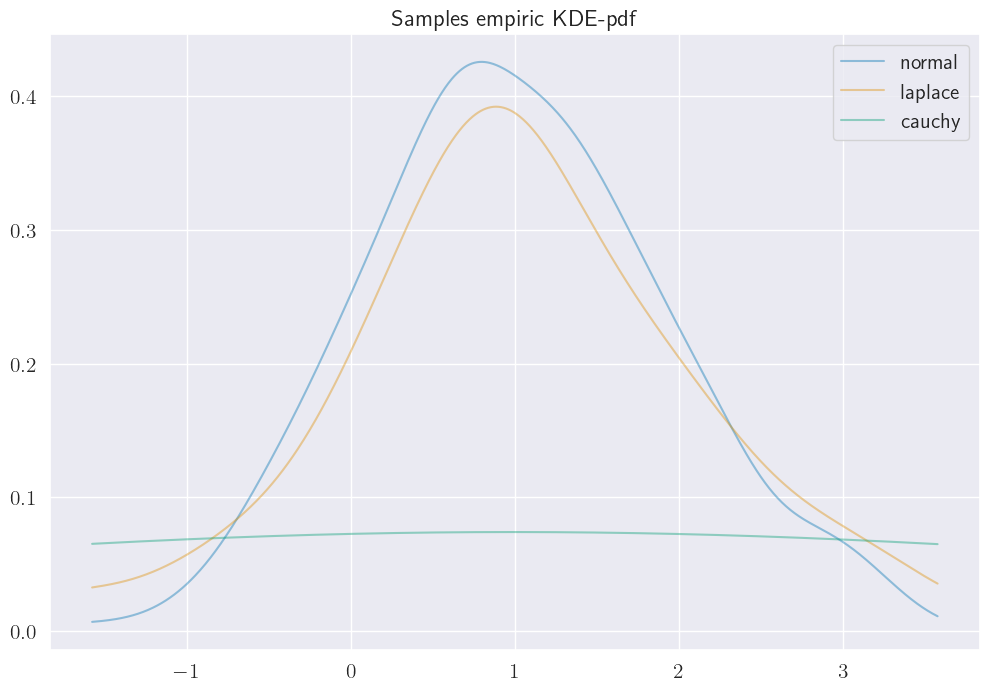

In [66]:
plt.figure(figsize=(12, 8))
plt.title('Samples empiric KDE-pdf')
grid = np.linspace(sps.norm(loc=1.0).ppf(0.005), sps.norm(loc=1.0).ppf(0.995), 1000)

plt.plot(grid, sps.gaussian_kde(sample_normal).pdf(grid), alpha=0.4, color=color_for_normal, label='normal')
plt.plot(grid, sps.gaussian_kde(sample_laplace).pdf(grid), alpha=0.4, color=color_for_laplace, label='laplace')
plt.plot(grid, sps.gaussian_kde(sample_cauchy).pdf(grid), alpha=0.4, color=color_for_cauchy, label='cauchy')
plt.legend()

plt.show()

2) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

In [69]:
# Эксперименты с оценкой средним и медианы
print('Original value: %.1f' % (theta, ))
print('Normal:\nSample mean: %.5f; sample median: %.5f' % (sample_normal.mean(), np.median(sample_normal)))
print('Sample mean abs error: %.5f; sample median abs error: %.5f' % (abs(sample_normal.mean() - theta),
                                                                           abs(np.median(sample_normal) - theta)))
print('Laplace:\nSample mean: %.5f; sample median: %.5f' % (sample_laplace.mean(), np.median(sample_laplace)))
print('Sample mean abs error: %.5f; sample median abs error: %.5f' % (abs(sample_laplace.mean() - theta),
                                                                           abs(np.median(sample_laplace) - theta)))
print('Cauchy:\nsample mean: %.5f; sample median: %.5f' % (sample_cauchy.mean(), np.median(sample_cauchy)))
print('Sample mean abs error: %.5f; sample median abs error: %.5f' % (abs(sample_cauchy.mean() - theta),
                                                                           abs(np.median(sample_cauchy) - theta)))


Original value: 1.0
Normal:
Sample mean: 1.00560; sample median: 0.95071
Sample mean abs error: 0.00560; sample median abs error: 0.04929
Laplace:
Sample mean: 1.04670; sample median: 0.97618
Sample mean abs error: 0.04670; sample median abs error: 0.02382
Cauchy:
sample mean: 1.55759; sample median: 0.97367
Sample mean abs error: 0.55759; sample median abs error: 0.02633


**Ответ:**
* Нормальное: будем пользоваться выборочным средним. Видно из эксперимента, плюс помним, что если есть выборка $X_1, \ldots, X_n \sim \mathcal{N}(a, \sigma^2)$, то оценка $\overline{\mathbf{X}}$ имеет асимптотическую дисперсию $\sigma^2$ а оценка $\hat{\mathbf{\mu}}$ - $\frac{\pi\sigma^2}{2}$.
* Лаплас: выборочной медианой так как для выборки $X_1, \ldots, X_n \sim \text{Laplace}(\mu, b)$ её асимптотическая дисперсия равна $b^2$, в то время как у среднего дисперсия равна $2b^2$
* Коши: выборочная медиана, поскольку матожа у него не существует и выборочное среднее никуда сходиться не будет.

3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [73]:
def truncated_mean(sample, alpha=0.3):
    n = len(sample)
    k = int(np.ceil(alpha*n))
    return (np.sort(sample)[k: n - k]).mean()

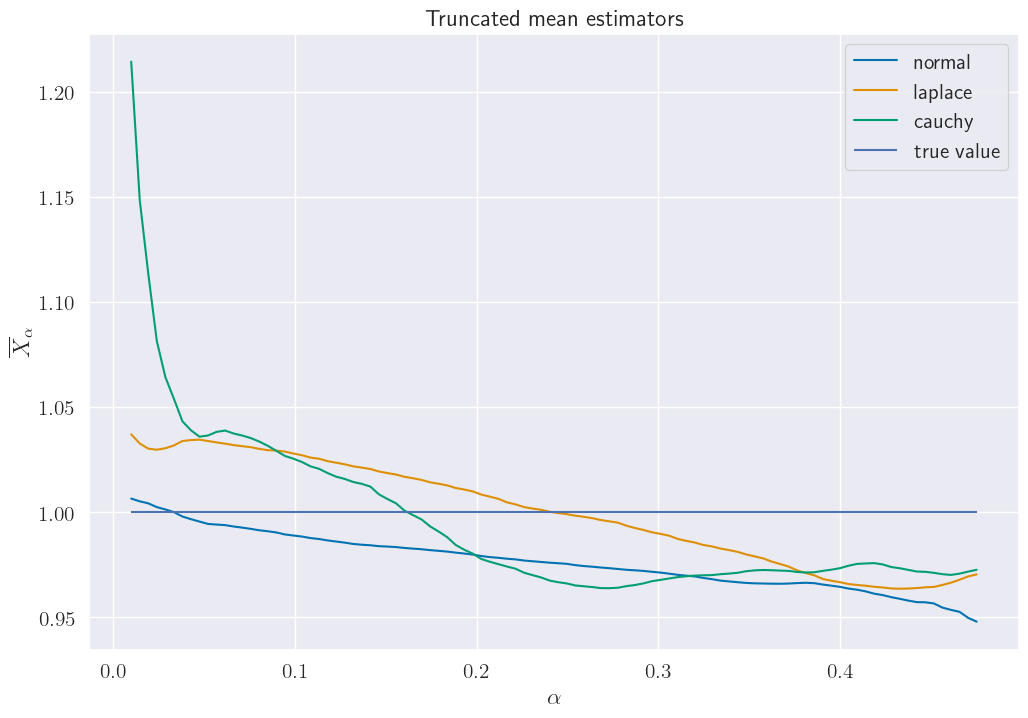

In [75]:
plt.figure(figsize=(12, 8))
alpha_array = np.linspace(0.01, 0.475, 100)

normal_truncated_means = np.array([truncated_mean(sample_normal, alpha) for alpha in alpha_array])
laplace_truncated_means = np.array([truncated_mean(sample_laplace, alpha) for alpha in alpha_array])
cauchy_truncated_means = np.array([truncated_mean(sample_cauchy, alpha) for alpha in alpha_array])

plt.title('Truncated mean estimators')
plt.plot(alpha_array, normal_truncated_means, color = color_for_normal, label='normal')
plt.plot(alpha_array, laplace_truncated_means, color = color_for_laplace, label='laplace')
plt.plot(alpha_array, cauchy_truncated_means, color = color_for_cauchy, label='cauchy')
plt.hlines(y=1.0, xmin=alpha_array.min(), xmax=alpha_array.max(), label='true value')
plt.ylabel(r'$\overline{X}_\alpha$')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

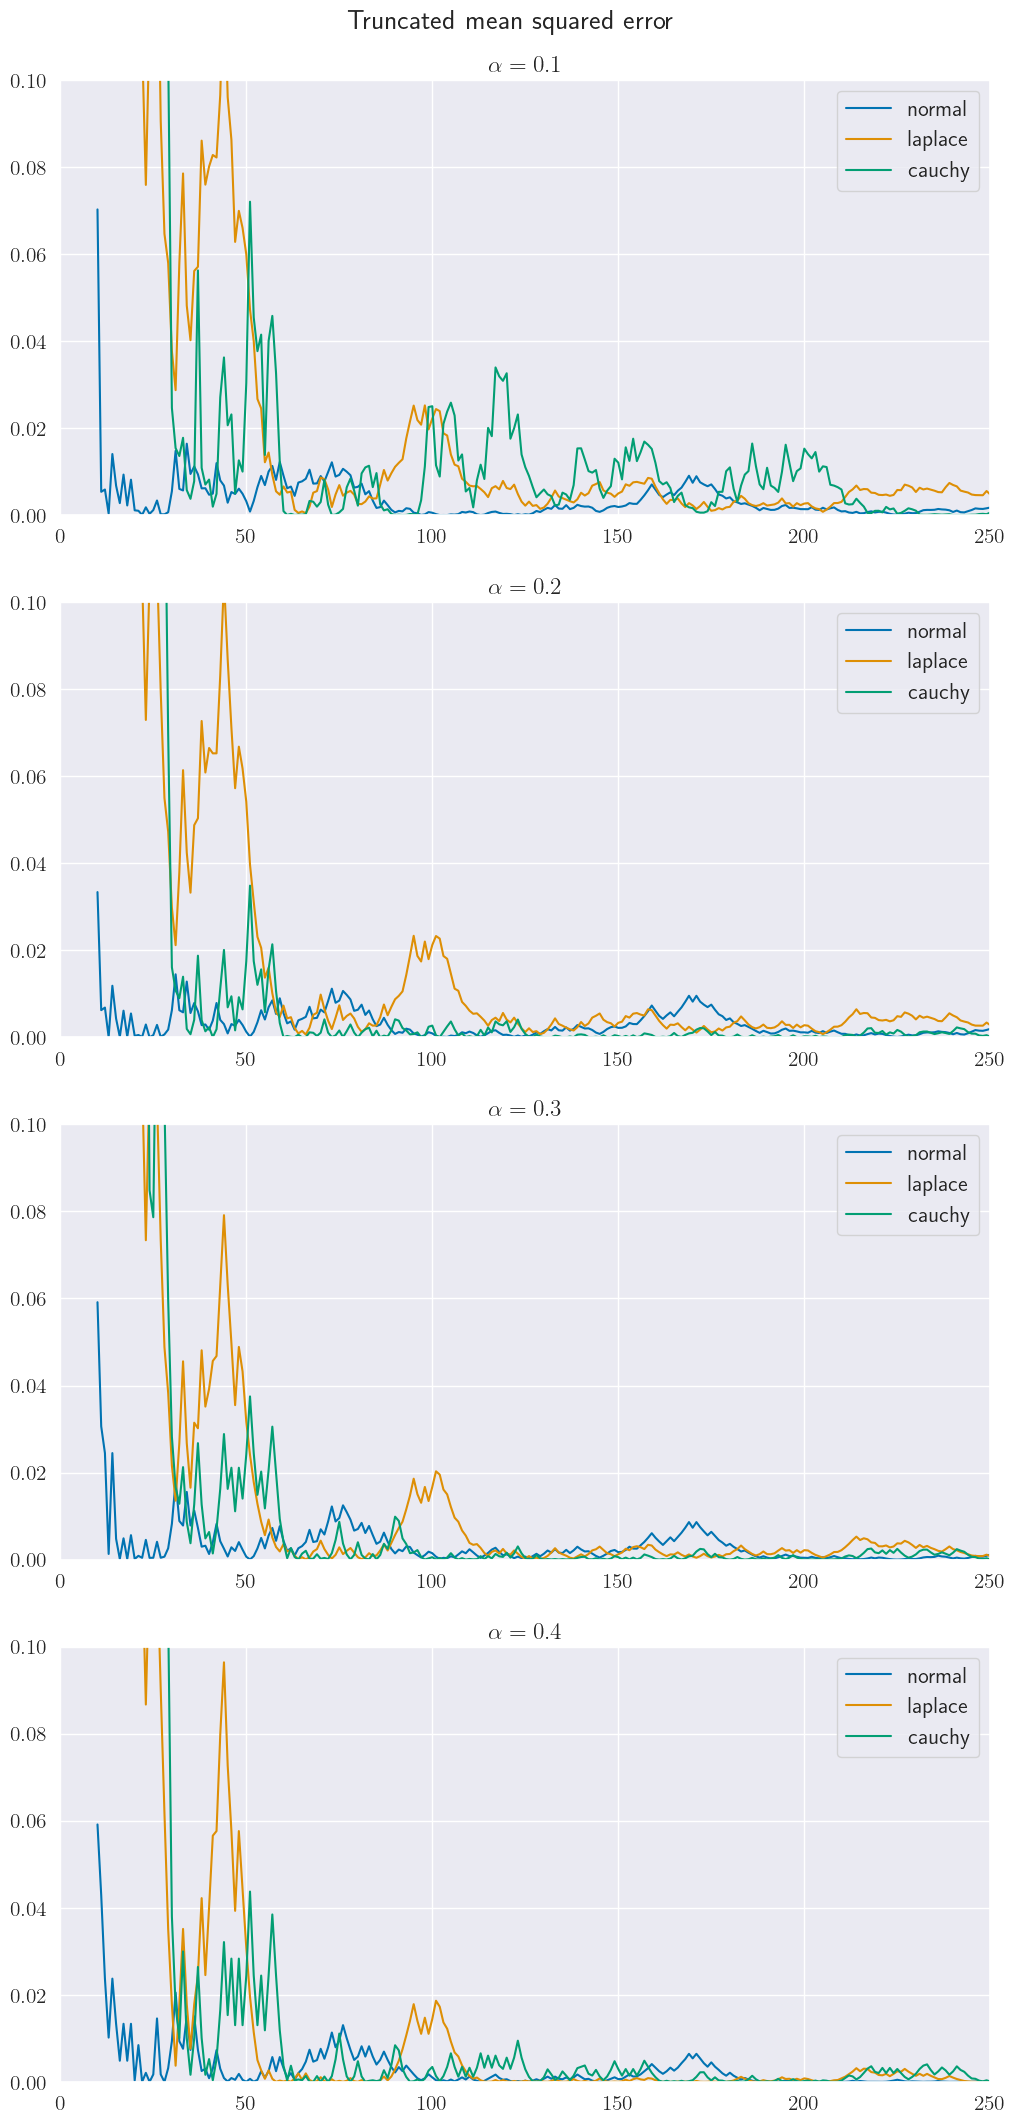

In [80]:
alpha_array = np.arange(0.1, 0.4, 0.1)
fig, axs = plt.subplots(len(alpha_array), figsize=(12, 26))
fig.suptitle('Truncated mean squared error', y=0.907, fontsize=20)

grid = np.arange(10, 500)
for idx, ax in np.ndenumerate(axs):
    alpha = alpha_array[idx]
    normal_truncated_means = np.array([truncated_mean(sample_normal[:k], alpha) for k in  grid])
    laplace_truncated_means = np.array([truncated_mean(sample_laplace[:k], alpha) for k in  grid])
    cauchy_truncated_means = np.array([truncated_mean(sample_cauchy[:k], alpha) for k in  grid])
    ax.set_title(r'$\alpha = %.1f$' % (alpha, ))
    ax.plot(grid, (normal_truncated_means - theta)**2, color=color_for_normal, label='normal')
    ax.plot(grid, (laplace_truncated_means - theta)**2, color=color_for_laplace, label='laplace')
    ax.plot(grid, (cauchy_truncated_means - theta)**2, color=color_for_cauchy, label='cauchy')
    ax.set_ylim(0, 0.1)
    ax.set_xlim(0, 250)
    ax.legend(fontsize=16)
plt.show()

Видим, что точность растет с увеличением $\alpha$.

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

In [82]:
from scipy.integrate import quad

def squared_pdf(x, distribution):
    return (x**2)*distribution.pdf(x)

def asymp_var_emp(distribution, alpha=0.3):
    N = 1000
    data = distribution.rvs(size=(N, N))
    est_arr = np.apply_along_axis(truncated_mean, 1, data, (alpha))
    return (np.sqrt(N)*(est_arr - distribution.median())).var()

def asymp_var_th(distribution, alpha=0.3):
    u = distribution.ppf(1 - alpha)
    integral, err = quad(squared_pdf, 0, u, (distribution, ))
    return 2*(integral + alpha*(u**2))/((1-2*alpha)**2)

def truncated_variance(sample, alpha=0.3):
    n = len(sample)
    k = int(np.ceil(alpha*n))
    return (np.sort(sample)[k: n - k]).var()

def truncated_variance_th(distribution, alpha):
    u = distribution.ppf(1 - alpha)
    integral, err = quad(squared_pdf, -u, u, (distribution, ))
    return integral/(1 - 2*alpha)

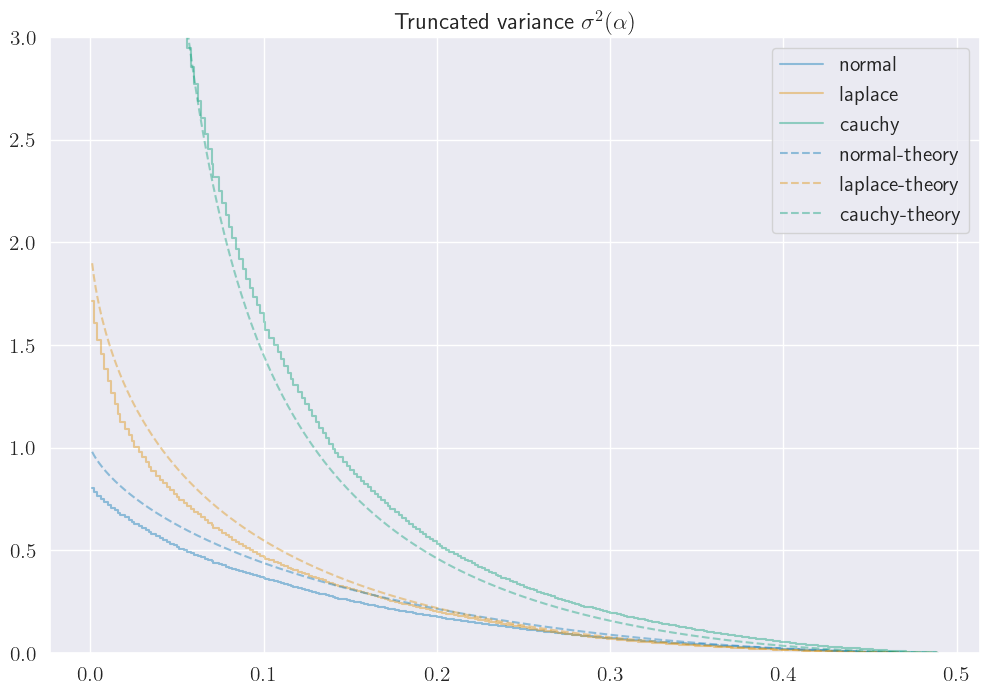

In [84]:
alpha_array = np.arange(0.001, 0.49, 0.001)

normal_variance = np.array([truncated_variance(sample_normal, alpha) for alpha in alpha_array])
laplace_variance = np.array([truncated_variance(sample_laplace, alpha) for alpha in alpha_array])
cauchy_variance = np.array([truncated_variance(sample_cauchy, alpha) for alpha in alpha_array])
normal_variance_th = np.array([truncated_variance_th(sps.norm, alpha) for alpha in alpha_array])
laplace_variance_th = np.array([truncated_variance_th(sps.laplace, alpha) for alpha in alpha_array])
cauchy_variance_th = np.array([truncated_variance_th(sps.cauchy, alpha) for alpha in alpha_array])

plt.figure(figsize=(12, 8))
plt.title(r'Truncated variance $\sigma^2(\alpha)$')
plt.step(alpha_array, normal_variance, color = color_for_normal, alpha=0.4, label='normal')
plt.step(alpha_array, laplace_variance, color = color_for_laplace, alpha=0.4, label='laplace')
plt.step(alpha_array, cauchy_variance, color = color_for_cauchy, alpha=0.4, label='cauchy')
plt.plot(alpha_array, normal_variance_th, color = color_for_normal, alpha=0.4, label='normal-theory', linestyle='dashed')
plt.plot(alpha_array, laplace_variance_th, color = color_for_laplace, alpha=0.4, label='laplace-theory', linestyle='dashed')
plt.plot(alpha_array, cauchy_variance_th, color = color_for_cauchy, alpha=0.4, label='cauchy-theory', linestyle='dashed')
plt.ylim(0, 3)

plt.legend()
plt.show()

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

Имеем $X_1, \ldots, X_n$. Пусть $r = [an]$. Тогда $\overline{X}_{n, \alpha} = \frac{1}{n - 2r}\sum_{i = r + 1}^{n - r}X_{(i)}$. Будем считать, что случ величины оцентрированы, т. е. отсутствует матож. Положим 
$$
R_n = \frac{1}{\sqrt{n}}\sum_{i = r + 1}^{n - r}\left[X_{(i)} - \mathbb{E}(X_{(i)} \,\, | \,\, X_{(r)}, X_{(n - r + 1)}) \right],
$$ 
$$
S_n = \sqrt{n}(X_{(r)} - u_\alpha), \,\, \text{где} \,\, u_\alpha - \alpha\text{ - квантиль исходного распределения},
$$ 
$$
T_n = \sqrt{n}(X_{(n - r + 1)} - u_{1-\alpha}).
$$
Случайный вектор $(R_n, S_n, T_n)$ будет гауссовским с нулевым средним и матрицей ковариаций: 
$$
\begin{bmatrix} \int_{u_\alpha}^{u_{1 - \alpha}}t^2f(t)dt & 0 & 0 \\ 0 & \alpha(1-\alpha)/f^2(u_\alpha) & \alpha^2/f^2(u_\alpha) \\ 0 & \alpha^2/f^2(u_\alpha) & \alpha(1-\alpha)/f^2(u_\alpha) \end{bmatrix}.
$$
Заметим также, что при условии $X_{(r)}, X_{(n - r + 1)}$ случайные величины $X_{(r)}, \ldots, X_{(n - r)}$ - ведут себя как порядковые статистике в размере $n - 2r$ на отрезке $[X_{(r)}, X_{(n - r + 1)}]$ с плотностью $\frac{p(t)}{F(X_{(n - r + 1)}) - F(X_{(r)})}$, где $p(t), F(t)$ - плотность и функция исходного распределения. Из вышесказанного заключаем, что 
$$
\mathbb{E}(X_{(i)}\,\,|\,\,X_{r}, X_{(n - r + 1)}) = \frac{n - 2r}{(F(X_{(n - r + 1)}) - F(X_{(r)}))^{n - 2r}} \int_{X_{(r)}}^{X_{(n-r+1)}}t f(t)dt\cdot \left[\sum_{k=0}^{n - 2r - 1}C_{n - 2r - 1}^k (F(t) - F(X_{(r)}))^k\cdot (F(X_{n - r + 1}) - F(t))^{n-2r-1-k} \right] = 
$$ 
$$
= \frac{n - 2r}{F(X_{(n - r + 1)}) - F(X_{(r)})} \int_{X_(r)}^{X_(n - r + 1)} tf(t)dt.
$$ 
Откуда заключаем, что 
$$
\sqrt{n}\overline{X}_{n, \alpha} = \frac{n}{n - 2r}R_n + \sqrt{n}\frac{\int_{X_{(r)}}^{X_{(n - r + 1)}} tf(t)dt}{F(X_{(n - r + 1)}) - F(X_{(r)})},
$$ а из этого, а также из теоремы о многомерном наследовании асимптотической нормальности, что асимптотическая дисперсия усечённого среднего будет равна 
$$
\sigma^2(\alpha) = \frac{\int_{u_\alpha}^{u_{1 - \alpha}} x^2 dF(x) + 2\alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2}
$$

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

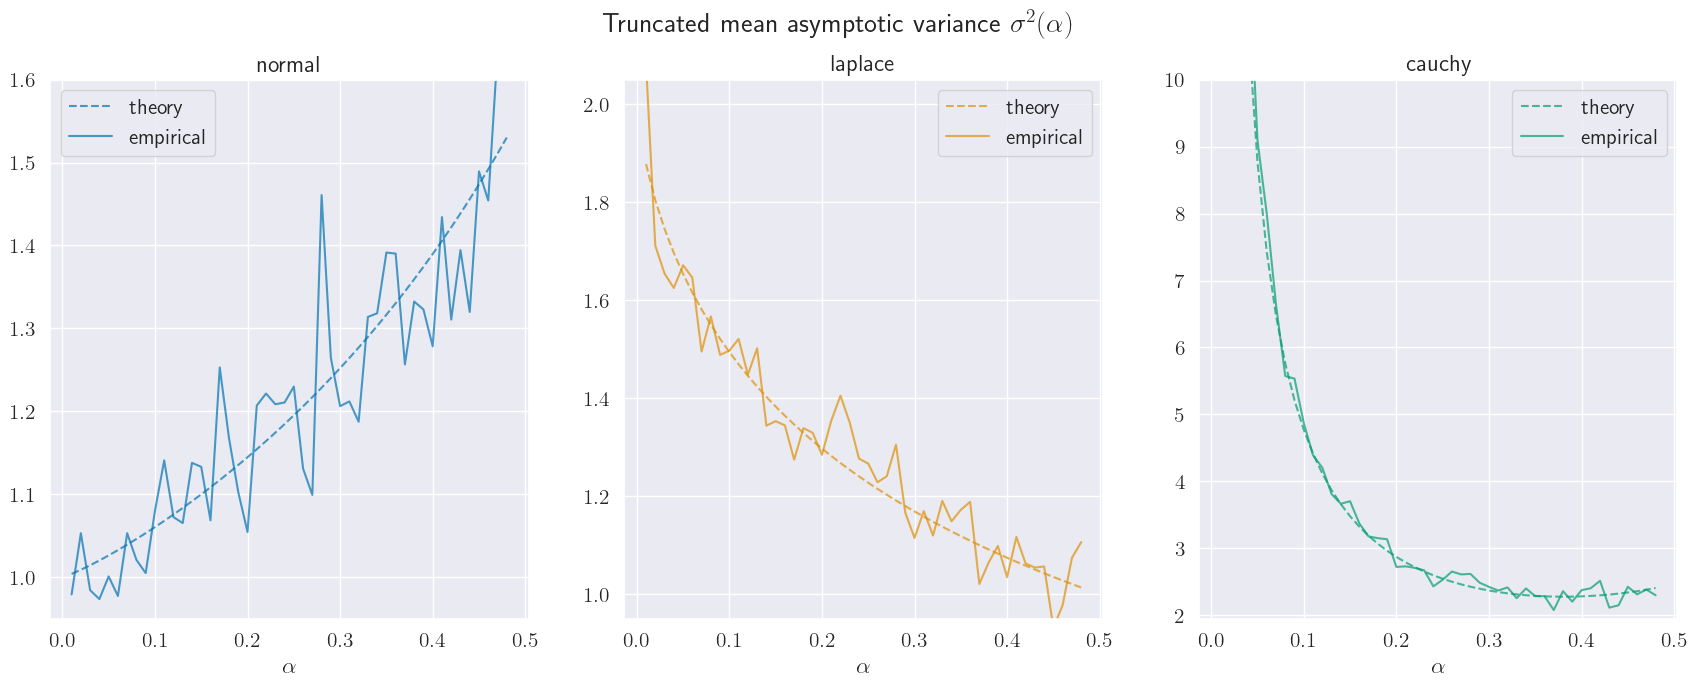

In [88]:
alpha_array = np.arange(0.01, 0.49, 0.01)

norm_th = [asymp_var_th(sps.norm, alpha) for alpha in alpha_array]
lapl_th = [asymp_var_th(sps.laplace, alpha) for alpha in alpha_array]
cauch_th = [asymp_var_th(sps.cauchy, alpha) for alpha in alpha_array]

norm_emp = [asymp_var_emp(sps.norm(loc=theta), alpha) for alpha in alpha_array]
lapl_emp = [asymp_var_emp(sps.laplace(loc=theta), alpha) for alpha in alpha_array]
cauch_emp = [asymp_var_emp(sps.cauchy(loc=theta), alpha) for alpha in alpha_array]

variance_th = np.array([norm_th, lapl_th, cauch_th])
variance_emp = np.array([norm_emp, lapl_emp, cauch_emp])

colors = np.array([color_for_normal,
          color_for_laplace,
          color_for_cauchy])
names = np.array(['normal', 'laplace', 'cauchy'])
lims = np.array([(0.95, 1.6), (0.95, 2.05), (1.95, 10.0)])

fig, axs = plt.subplots(1, 3, figsize=(21, 7))
fig.suptitle(r'Truncated mean asymptotic variance $\sigma^2(\alpha)$', y=0.98, fontsize=20)

for idx, ax in np.ndenumerate(axs):
    ax.plot(alpha_array, variance_th[idx], color=colors[idx],
            alpha=0.7, label='theory', linestyle='dashed')
    ax.plot(alpha_array, variance_emp[idx], color=colors[idx],
            alpha=0.7, label='empirical')
    ax.set_title(names[idx])
    ax.set_xlabel(r'$\alpha$')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylim(lims[idx])
    ax.legend()

plt.show()

6) Breakdown point в статистике неформально называется такое наибольшее число $x$ от 0 до 1, что если изменить больше $(100\cdot x)\%$ наблюдений выборки на выбросы, то оценка "пойдёт в разнос" и её значение может оказаться сколь угодно большим по модулю, как если бы вся выборка состояла из выбросов.

Предположите, как Breakdown point зависит от параметра $\alpha$.

Ответ: напрямую, $x = \alpha$ поскольку если мы считаем усеченное среднее порядка $\alpha$, то заменив $(100\cdot \alpha)\%$ наблюдений на выбросы (либо много большие либо много меньшие выборки), то эти выбросы обязательно попадут в $\alpha$ или $1-\alpha$ хвосты и будут обрезаны.

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных $(100\cdot x)\%$ выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

In [634]:
def tamper_with_data(data, x):
    N = len(data)
    k = int(np.ceil(N*x))
    indices = np.random.randint(0, N - 1, k)
    val = ((abs(data)).max()**2)*100
    data_new = data.copy()
    data_new[indices] = val
    return data_new

Normal estimate slope:  1.6382493438768209
Laplace estimate slope:  1.8956231427938293
Cauchy estimate slope:  3.514525604538182


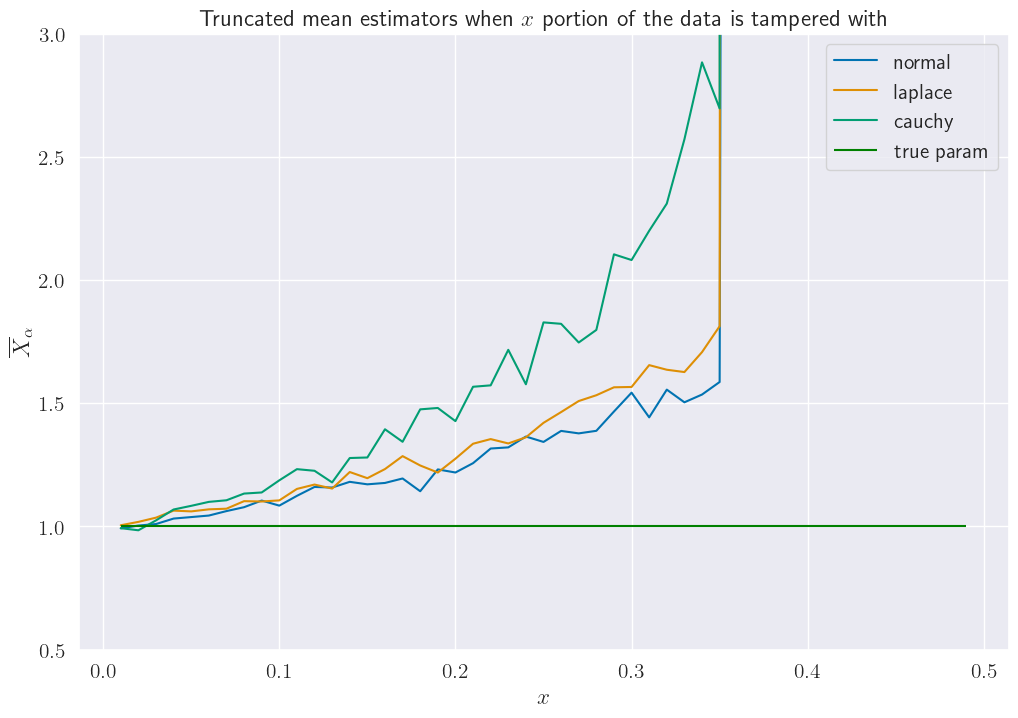

In [664]:
plt.figure(figsize=(12, 8))
x_arr = np.arange(0.01, 0.5, 0.01)

normal_tampered_truncated_means = np.array([truncated_mean(tamper_with_data(sample_normal, x)) for x in x_arr])
laplace_tampered_truncated_means = np.array([truncated_mean(tamper_with_data(sample_laplace, x)) for x in x_arr])
cauchy_tampered_truncated_means = np.array([truncated_mean(tamper_with_data(sample_cauchy, x)) for x in x_arr])

coef_1 = sps.linregress(x_arr[:30], normal_tampered_truncated_means[:30])
coef_2 = sps.linregress(x_arr[:30], laplace_tampered_truncated_means[:30])
coef_3 = sps.linregress(x_arr[:30], cauchy_tampered_truncated_means[:30])

print('Normal estimate slope: ', coef_1.slope)
print('Laplace estimate slope: ', coef_2.slope)
print('Cauchy estimate slope: ', coef_3.slope)

plt.title(r'Truncated mean estimators when $x$ portion of the data is tampered with')
plt.plot(x_arr, normal_tampered_truncated_means, color = color_for_normal, label='normal')
plt.plot(x_arr, laplace_tampered_truncated_means, color = color_for_laplace, label='laplace')
plt.plot(x_arr, cauchy_tampered_truncated_means, color = color_for_cauchy, label='cauchy')
plt.hlines(theta, x_arr.min(), x_arr.max(), color='green', label='true param')
#plt.hlines(y=1.0, xmin=alpha_array.min(), xmax=alpha_array.max(), label='true value')
plt.ylim(0.5, 3)
plt.ylabel(r'$\overline{X}_\alpha$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()

7) Для каждого распределения на отдельном графике по всем префиксам постройте значение трех оценок: среднего, медианы и усечённого среднего порядка $0.35$. Для усечённого среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

In [101]:
n = np.arange(1, N + 1)
alpha = 0.35
normal_means = np.cumsum(sample_normal)/n
laplace_means = np.cumsum(sample_laplace)/n
cauchy_means = np.cumsum(sample_cauchy)/n
normal_medians = np.array([np.median(sample_normal[:k]) for k in n])
laplace_medians = np.array([np.median(sample_laplace[:k]) for k in n])
cauchy_medians = np.array([np.median(sample_cauchy[:k]) for k in n])
normal_truncated_means = np.array([truncated_mean(sample_normal[:k], alpha) for k in n[10:]])
laplace_truncated_means = np.array([truncated_mean(sample_laplace[:k], alpha) for k in n[10:]])
cauchy_truncated_means = np.array([truncated_mean(sample_cauchy[:k], alpha) for k in n[10:]])

**Нормальное распределение**

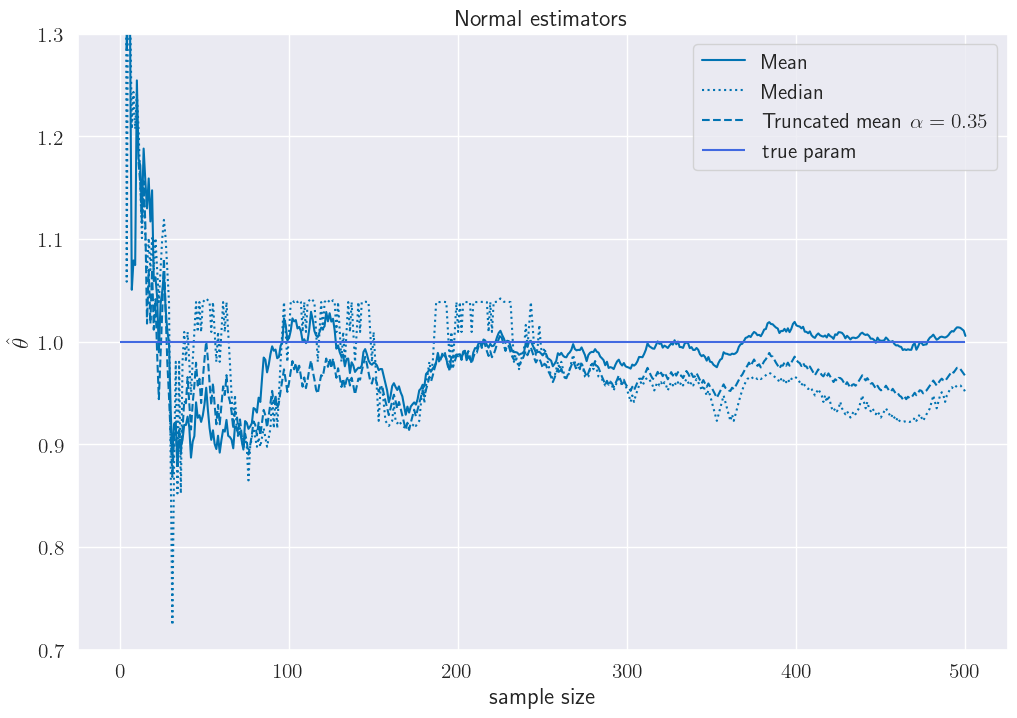

In [114]:
plt.figure(figsize=(12, 8))

plt.title('Normal estimators')
plt.plot(n, normal_means, color = color_for_normal, label='Mean')
plt.plot(n, normal_medians, ':', color = color_for_normal, label='Median')
plt.plot(n[10:], normal_truncated_means, '--', color = color_for_normal, label=r'Truncated mean $\alpha = %.2f$' % (alpha, ))
plt.hlines(theta, 0, 500, color='royalblue', label='true param')
plt.ylabel(r'$\hat{\theta}$')
plt.xlabel('sample size')
plt.ylim(0.7, 1.3)
plt.legend()
plt.show()

**Распределение Лапласа**

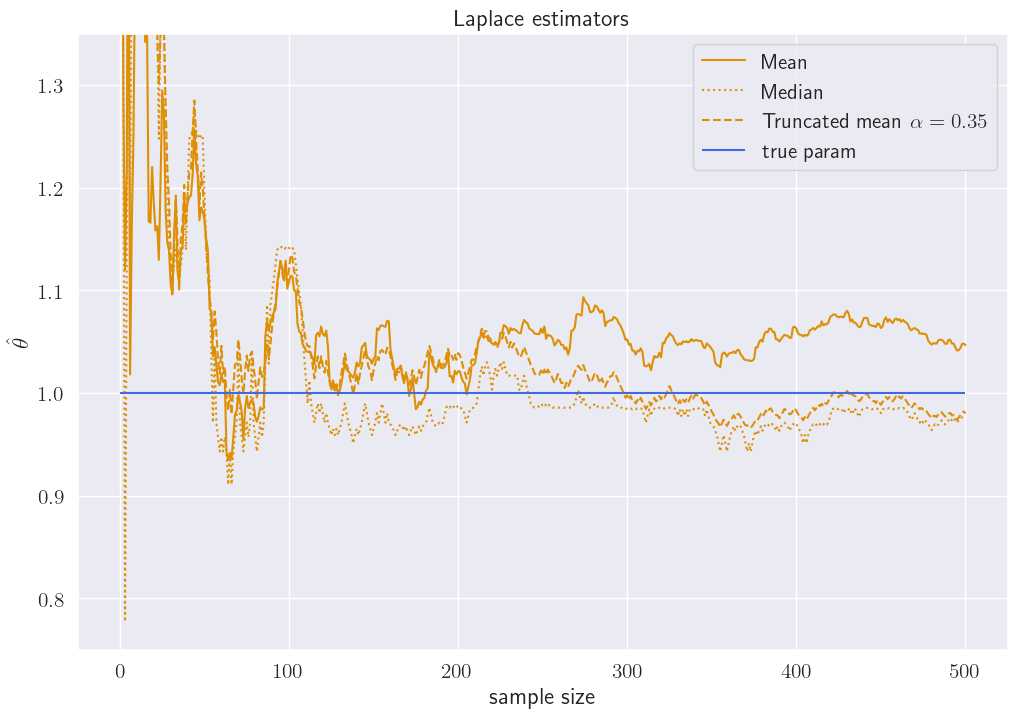

In [110]:
plt.figure(figsize=(12, 8))

plt.title('Laplace estimators')
plt.plot(n, laplace_means, color = color_for_laplace, label='Mean')
plt.plot(n, laplace_medians, ':', color = color_for_laplace, label='Median')
plt.plot(n[10:], laplace_truncated_means, '--',
         color = color_for_laplace, label=r'Truncated mean $\alpha = %.2f$' % (alpha, ))
plt.hlines(theta, 0, 500, color='royalblue', label='true param')
plt.ylabel(r'$\hat{\theta}$')
plt.xlabel('sample size')
plt.ylim(0.75, 1.35)
plt.legend()
plt.show()

**Распределение Коши**

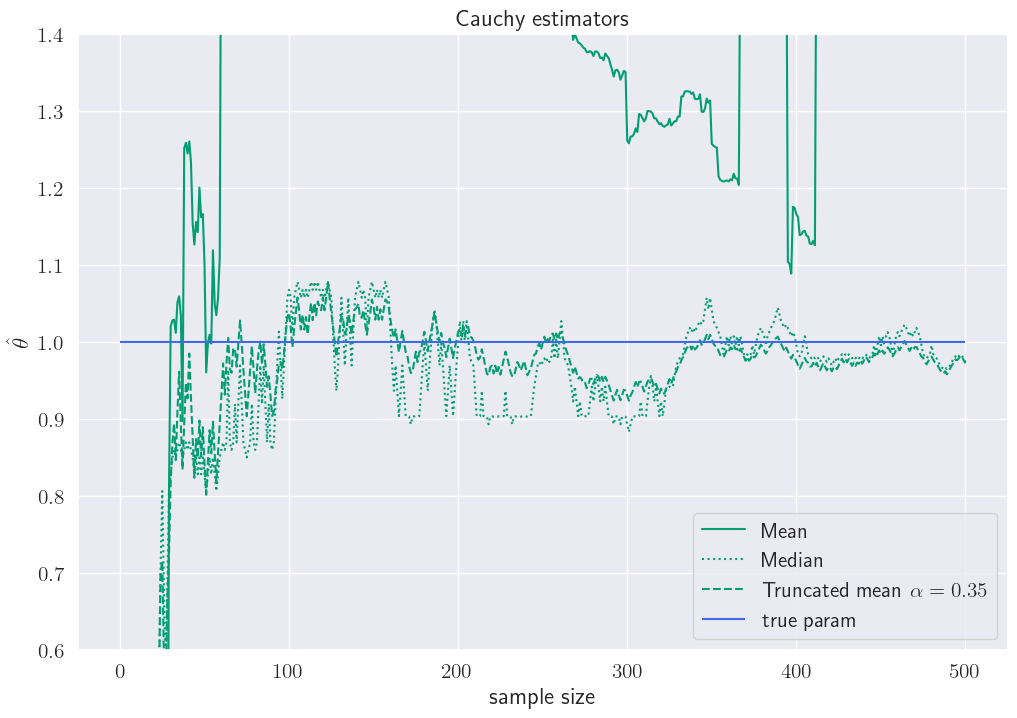

In [120]:
plt.figure(figsize=(12, 8))

plt.title('Cauchy estimators')
plt.plot(n, cauchy_means, color = color_for_cauchy, label='Mean')
plt.plot(n, cauchy_medians, ':', color = color_for_cauchy, label='Median')
plt.plot(n[10:], cauchy_truncated_means, '--', color = color_for_cauchy, label=r'Truncated mean $\alpha = %.2f$' % (alpha, ))
plt.hlines(theta, 0, 500, color='royalblue', label='true param')
plt.ylabel(r'$\hat{\theta}$')
plt.xlabel('sample size')
plt.ylim(0.6, 1.4)
plt.legend()
plt.show()

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

Видим, что во всех случаях оценка усечённого среднего хороша и даже в состоянии составить конкуренцию оценке медианы. Видим также, что дисперсия оценки усечённого среднего при увеличении $\alpha$ стремится к нулю, чего не скажешь об её асимптотической дисперсии. Для каждой оценки поведение асимптотоической дисперсии разное: для распределения коши лучше брать $\alpha > 0.2$, для лапласа - как можно больше, для нормального - как можно меньше. Из этих соображений уже можно подбирать небоходимое значение.

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального Правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}(\sum_{i=1}^n\rho(x_i - \theta))$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее? Указание: "усекать" можно не только по квантилю, но и по числу

Ответ: пусть $\mathbf{X} = (x_1, \ldots, x_n)$ - выборка. Возьмём $\rho(t) = \frac{t^2}{2}, \,\text{при}\, |t| \le k, \quad \rho(t) = \frac{k^2}{2}, \,\text{при}\, |t| > k$. Тогда минимизируя $Q(\xi) = \sum_{i = 1}^{n}\rho(x_i - \xi)$, получаем выражение $Q(\hat{\theta}(\mathbf{X}) = \sum_{|x_i - \hat{\theta}(\mathbf{X}| < k}(x_i - \hat{\theta}(\mathbf{X}) = 0$, а из него уже и оценку усеченного среднего.

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $(\sum_{i=1}^n\psi(x_i - \theta)) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ: если функция $\rho(t)$ - непрерывно дифференцируема, то условие её минимума можно записать также в виде второго определения через её производную $(\sum_{i=1}^n\rho'(x_i - \theta)) = 0$. Однако класс оптимальных оценок в смысле первого определения, поскольку как минимум он включает в себя функцию $\rho(t) = |t|$, дающую оценку на медиану. Поскольку в модуля нет производной в нуле, оптимизационная задача в смысле второго определения для него не определена.

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

In [457]:
from statsmodels.robust.norms import TukeyBiweight, Hampel

In [483]:
Hampel().rho(13)

10.0

In [503]:
def hubor_loss(x, a):
    if (abs(x) <= a):
        return 0.5*x**2
    else:
        return a*abs(x) - 0.5*a**2

In [505]:
def squared_error(x, sample):
    return ((sample - np.full(len(sample), x))**2).sum()   

def absolute_error(x, sample):
    return abs(sample - np.full(len(sample), x)).sum()

def hubor_loss_sample(x, a, sample):
    return np.array([hubor_loss(sample[i] - x, a) for i in range(len(sample))]).sum()

def biweight_sample(x, sample):
    return TukeyBiweight().rho((sample - np.full(len(sample), x))).sum()

def hampel(x, sample):
    return Hampel().rho((sample - np.full(len(sample), x))).sum()

In [507]:
print(sample_normal.shape)
print(sample_laplace.shape)
print(sample_cauchy.shape)

(500,)
(500,)
(500,)


In [509]:
import scipy.optimize as spo

In [553]:
print('Normal distribution results:')
res_1 = spo.minimize(squared_error, 0, args=(sample_normal))
res_2 = spo.minimize(absolute_error, 0, args=(sample_normal))
res_3 = spo.minimize(hubor_loss_sample, 0, args=(3, sample_normal))
res_4 = spo.minimize(biweight_sample, 0, args=(sample_normal))
res_5 = spo.minimize(hampel, 0, args=(sample_normal))
print('rho func, squared error: ', res_1.x[0])
print('rho func, absolute error: ', res_2.x[0])
print('rho func, hubor loss, k = 3: ', res_3.x[0])
print('rho func, biweight func c=4.685: ', res_4.x[0])
print('rho func, hampel func a=2.0, b=4.0, c=8.0: ', res_5.x[0])

Normal distribution results:
rho func, squared error:  1.0055978431535393
rho func, absolute error:  0.9514256947241241
rho func, hubor loss, k = 3:  1.0055978481443064
rho func, biweight func c=4.685:  0.995306408832945
rho func, hampel func a=2.0, b=4.0, c=8.0:  1.0059448604420322


In [555]:
print('Laplace distribution results:')
res_1 = spo.minimize(squared_error, 0, args=(sample_laplace))
res_2 = spo.minimize(absolute_error, 0, args=(sample_laplace))
res_3 = spo.minimize(hubor_loss_sample, 0, args=(3, sample_laplace))
res_4 = spo.minimize(biweight_sample, 0, args=(sample_laplace))
res_5 = spo.minimize(hampel, 0, args=(sample_laplace))
print('rho func, squared error: ', res_1.x[0])
print('rho func, absolute error: ', res_2.x[0])
print('rho func, hubor loss, k = 3: ', res_3.x[0])
print('rho func, biweight func c=4.685: ', res_4.x[0])
print('rho func, hampel func a=2.0, b=4.0, c=8.0: ', res_5.x[0])

Laplace distribution results:
rho func, squared error:  1.0466951525599049
rho func, absolute error:  0.9762103885242963
rho func, hubor loss, k = 3:  1.0297147840157506
rho func, biweight func c=4.685:  1.0159628770447682
rho func, hampel func a=2.0, b=4.0, c=8.0:  1.0272802759657924


In [557]:
print('Cauchy distribution results:')
res_1 = spo.minimize(squared_error, 0, args=(sample_cauchy))
res_2 = spo.minimize(absolute_error, 0, args=(sample_cauchy))
res_3 = spo.minimize(hubor_loss_sample, 0, args=(3, sample_cauchy))
res_4 = spo.minimize(biweight_sample, 0, args=(sample_cauchy))
res_5 = spo.minimize(hampel, 0, args=(sample_normal))
print('rho func, squared error: ', res_1.x[0])
print('rho func, absolute error: ', res_2.x[0])
print('rho func, hubor loss, k = 3: ', res_3.x[0])
print('rho func, biweight func c=4.685: ', res_4.x[0])
print('rho func, hampel func a=2.0, b=4.0, c=8.0: ', res_5.x[0])

Cauchy distribution results:
rho func, squared error:  1.5575888671875
rho func, absolute error:  0.9714710015474423
rho func, hubor loss, k = 3:  1.0236734068655333
rho func, biweight func c=4.685:  0.9497021365407223
rho func, hampel func a=2.0, b=4.0, c=8.0:  1.0059448604420322


3.5) Выразите усечённое среднее как L-оценку

Ответ: так как любая L-оценка выражается в виде $T_n = \sum_{i = 1}^{n}a_{i}h(x_{(i)})$, то, считая $r = [n\alpha]$, усеченное среднее можно выразить коэффициентами 
$$
a_1 = a_2 = \ldots = a_r = 0, \quad a_{r + 1} = \ldots = a_{n - r} = \frac{1}{n - 2r}, \quad, a_{n - r + 1} = \ldots = a_{n} = 0.
$$

4) Сравните результаты, полученные для трёх распределений и разных функций влияния. 

Проанализируем, что будет происходить с оценками при замене $x$-й части выборки на гарантированно очень большое число

First estimate mean:  236.8404633853568
Second estimate slope:  1.8546349541623988
Third estimate slope:  3.883347836696031


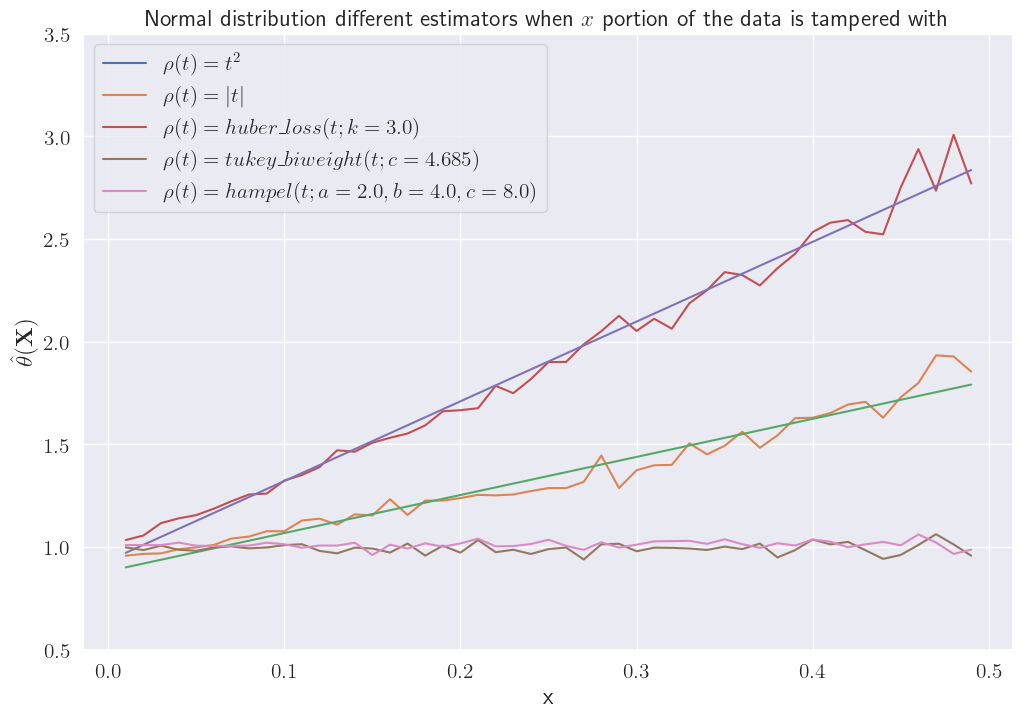

In [650]:
normal_1 = np.array([spo.minimize(squared_error, 0, args=(tamper_with_data(sample_normal, x))).x[0] for x in x_arr])
normal_2 = np.array([spo.minimize(absolute_error, 0, args=(tamper_with_data(sample_normal, x))).x[0] for x in x_arr])
normal_3 = np.array([spo.minimize(hubor_loss_sample, 0, args=(3, tamper_with_data(sample_normal, x))).x[0] for x in x_arr])
normal_4 = np.array([spo.minimize(biweight_sample, 0, args=(tamper_with_data(sample_normal, x))).x[0] for x in x_arr])
normal_5 = np.array([spo.minimize(hampel, 0, args=(tamper_with_data(sample_normal, x))).x[0] for x in x_arr])

coef_2 = sps.linregress(x_arr, normal_2)
coef_3 = sps.linregress(x_arr, normal_3)

print('First estimate mean: ', normal_1.mean())
print('Second estimate slope: ', coef_2.slope)
print('Third estimate slope: ', coef_3.slope)

plt.figure(figsize=(12, 8))
plt.title('Normal distribution different estimators when $x$ portion of the data is tampered with')
plt.plot(x_arr, normal_1, label=r'$\rho(t) = t^2$')
plt.plot(x_arr, normal_2, label=r'$\rho(t) = |t|$')
plt.plot(x_arr, coef_2.intercept + coef_2.slope*x_arr)
plt.plot(x_arr, normal_3, label=r'$\rho(t) = huber\_loss(t; k = 3.0)$')
plt.plot(x_arr, coef_3.intercept + coef_3.slope*x_arr)
plt.plot(x_arr, normal_4, label=r'$\rho(t) = tukey\_biweight(t; c=4.685)$')
plt.plot(x_arr, normal_5, label=r'$\rho(t) = hampel(t; a=2.0, b=4.0, c=8.0)$')
plt.ylim(0.5, 3.5)
plt.ylabel(r'$\hat{\theta}(\mathbf{X})$')
plt.xlabel(r'x')
plt.legend()
plt.show()


First estimate mean:  1122.651687483676
Second estimate slope:  2.1110462529908984
Third estimate slope:  4.087708065849528


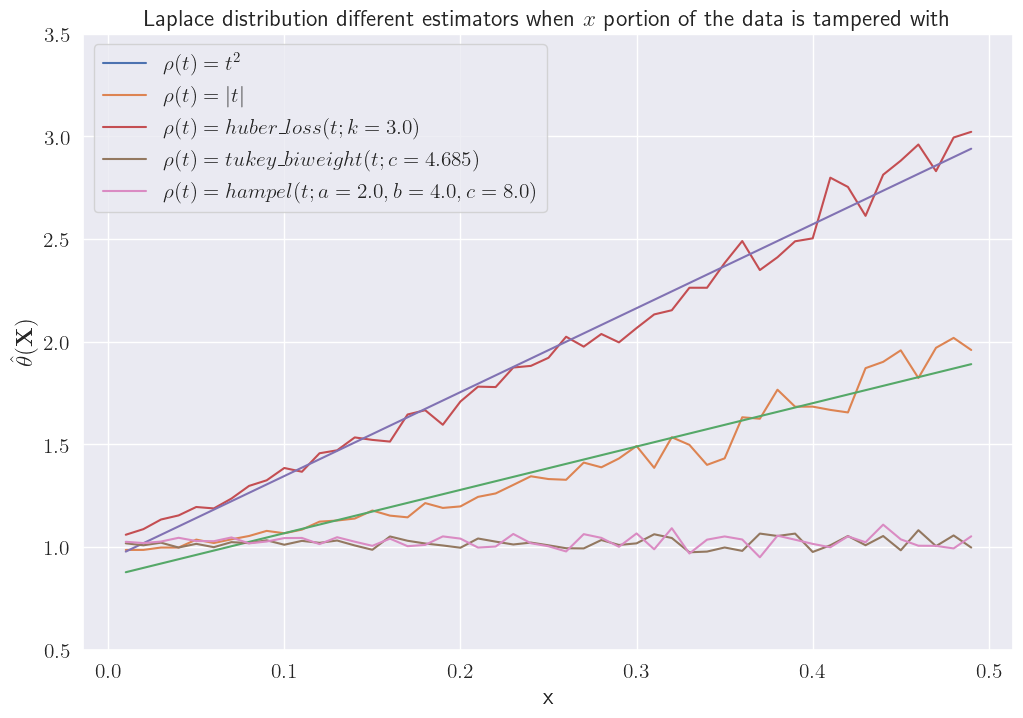

In [654]:
laplace_1 = np.array([spo.minimize(squared_error, 0, args=(tamper_with_data(sample_laplace, x))).x[0] for x in x_arr])
laplace_2 = np.array([spo.minimize(absolute_error, 0, args=(tamper_with_data(sample_laplace, x))).x[0] for x in x_arr])
laplace_3 = np.array([spo.minimize(hubor_loss_sample, 0, args=(3, tamper_with_data(sample_laplace, x))).x[0] for x in x_arr])
laplace_4 = np.array([spo.minimize(biweight_sample, 0, args=(tamper_with_data(sample_laplace, x))).x[0] for x in x_arr])
laplace_5 = np.array([spo.minimize(hampel, 0, args=(tamper_with_data(sample_laplace, x))).x[0] for x in x_arr])

coef_2 = sps.linregress(x_arr, laplace_2)
coef_3 = sps.linregress(x_arr, laplace_3)

print('First estimate mean: ', laplace_1.mean())
print('Second estimate slope: ', coef_2.slope)
print('Third estimate slope: ', coef_3.slope)

plt.figure(figsize=(12, 8))
plt.title('Laplace distribution different estimators when $x$ portion of the data is tampered with')
plt.plot(x_arr, laplace_1, label=r'$\rho(t) = t^2$')
plt.plot(x_arr, laplace_2, label=r'$\rho(t) = |t|$')
plt.plot(x_arr, coef_2.intercept + coef_2.slope*x_arr)
plt.plot(x_arr, laplace_3, label=r'$\rho(t) = huber\_loss(t; k = 3.0)$')
plt.plot(x_arr, coef_3.intercept + coef_3.slope*x_arr)
plt.plot(x_arr, laplace_4, label=r'$\rho(t) = tukey\_biweight(t; c=4.685)$')
plt.plot(x_arr, laplace_5, label=r'$\rho(t) = hampel(t; a=2.0, b=4.0, c=8.0)$')
plt.ylim(0.5, 3.5)
plt.ylabel(r'$\hat{\theta}(\mathbf{X})$')
plt.xlabel(r'x')
plt.legend()
plt.show()


First estimate mean:  968334.9278334172
Second estimate slope:  3.3152626049958984
Third estimate slope:  5.048344809348806


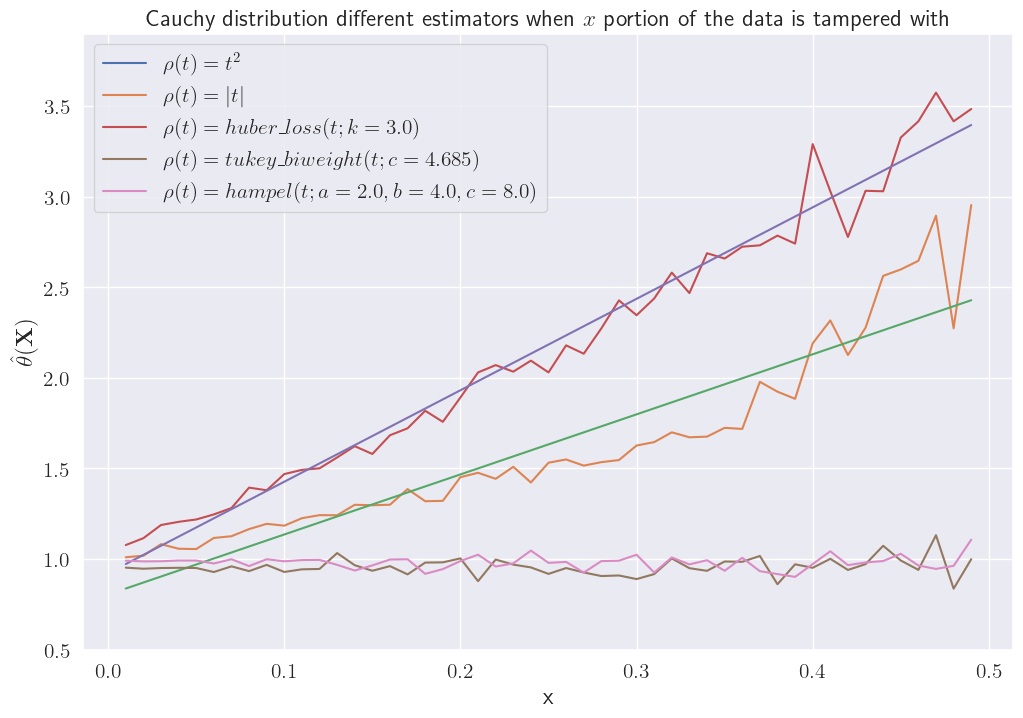

In [658]:
cauchy_1 = np.array([spo.minimize(squared_error, 0, args=(tamper_with_data(sample_cauchy, x))).x[0] for x in x_arr])
cauchy_2 = np.array([spo.minimize(absolute_error, 0, args=(tamper_with_data(sample_cauchy, x))).x[0] for x in x_arr])
cauchy_3 = np.array([spo.minimize(hubor_loss_sample, 0, args=(3, tamper_with_data(sample_cauchy, x))).x[0] for x in x_arr])
cauchy_4 = np.array([spo.minimize(biweight_sample, 0, args=(tamper_with_data(sample_cauchy, x))).x[0] for x in x_arr])
cauchy_5 = np.array([spo.minimize(hampel, 0, args=(tamper_with_data(sample_cauchy, x))).x[0] for x in x_arr])

coef_2 = sps.linregress(x_arr, cauchy_2)
coef_3 = sps.linregress(x_arr, cauchy_3)

print('First estimate mean: ', cauchy_1.mean())
print('Second estimate slope: ', coef_2.slope)
print('Third estimate slope: ', coef_3.slope)

plt.figure(figsize=(12, 8))
plt.title('Cauchy distribution different estimators when $x$ portion of the data is tampered with')
plt.plot(x_arr, cauchy_1, label=r'$\rho(t) = t^2$')
plt.plot(x_arr, cauchy_2, label=r'$\rho(t) = |t|$')
plt.plot(x_arr, coef_2.intercept + coef_2.slope*x_arr)
plt.plot(x_arr, cauchy_3, label=r'$\rho(t) = huber\_loss(t; k = 3.0)$')
plt.plot(x_arr, coef_3.intercept + coef_3.slope*x_arr)
plt.plot(x_arr, cauchy_4, label=r'$\rho(t) = tukey\_biweight(t; c=4.685)$')
plt.plot(x_arr, cauchy_5, label=r'$\rho(t) = hampel(t; a=2.0, b=4.0, c=8.0)$')
plt.ylim(0.5, 3.9)
plt.ylabel(r'$\hat{\theta}(\mathbf{X})$')
plt.xlabel(r'x')
plt.legend()
plt.show()


5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Касаемо точности и робастности: видим, что для всех оценок, кроме очевидного среднего, график оценки от $x$ представляет из себя примерно прямую $\Delta\theta = \alpha\cdot x$. Что означает, что если нам к примеру необходима точность определения оценки (величина максимального отклонения) не хуже $\Delta\theta_0$, то максимальный breakdown point, которым мы в таком случае можем себе позволить будет равен $x_0 = \Delta\theta_0 / \alpha.$ Коэффициент $\alpha$ назовём обратным коэффициентом робастности.
   
Выводы для каждой из функций:
* $\rho(t) = t^2$: Никакой робастности, гарантированно breakdownpoint $= 0$
* $\rho(t) = |t|$: Обратные коэффициенты робастности: Normal: 1.85; Laplace: 2.11; Cauchy: 3.31
* $\rho(t) = huber\_loss(t)$: Обратные коэффициенты робастности: Normal: 3.88; Laplace: 4.09; Cauchy: 5.05
* $\rho(t) = tukey\_biweight(t)$: Оценка с великолепной робастностью: вне зависимости от выбросов ведёт себя хорошо
* $\rho(t) = hampel(t)$: Оценка с великолепной робастностью: вне зависимости от выбросов ведёт себя хорошо

L оценку и анализ на breakdown point для неё мы уже сделали ранее, когда исследовали truncated mean и поведение этой оценки при tampering с выборкой. Для неё нашли обратные коэффициенты робастности: Normal: 1.64 Laplace: 1.9 Cauchy: 3.51

Сделайте единый вывод о робастном оценивании: 👍 отныне располагаем мало того, что точными оценками, так еще и хорошо устойчивыми к выбросам.

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [72]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

zsh:1: no matches found: https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta


In [2428]:
import pandas as pd
pd.options.mode.copy_on_write = True

In [2430]:
data = pd.read_csv("winequality-red.csv")

In [2432]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [2435]:
data.loc[(data['alcohol'] <= 10), 'category'] = 'low alcohol'
data.loc[(data['alcohol'] > 10) & ((data['alcohol'] <= 12)), 'category'] = 'medium alcohol'
data.loc[(data['alcohol'] > 12), 'category'] = 'high alcohol'
data.head(60)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low alcohol
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low alcohol
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low alcohol
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,low alcohol
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,low alcohol
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,low alcohol
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,low alcohol
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,medium alcohol


Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [2438]:
data_cut = data[['residual sugar', 'category']]
data_means = data_cut.groupby('category').agg(['mean', 'median'])
data_means

residual sugar       
                         mean median
category                            
high alcohol         2.760993    2.3
low alcohol          2.445984    2.1
medium alcohol       2.592264    2.2

Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** растет с ростом процента содержания алкоголя.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

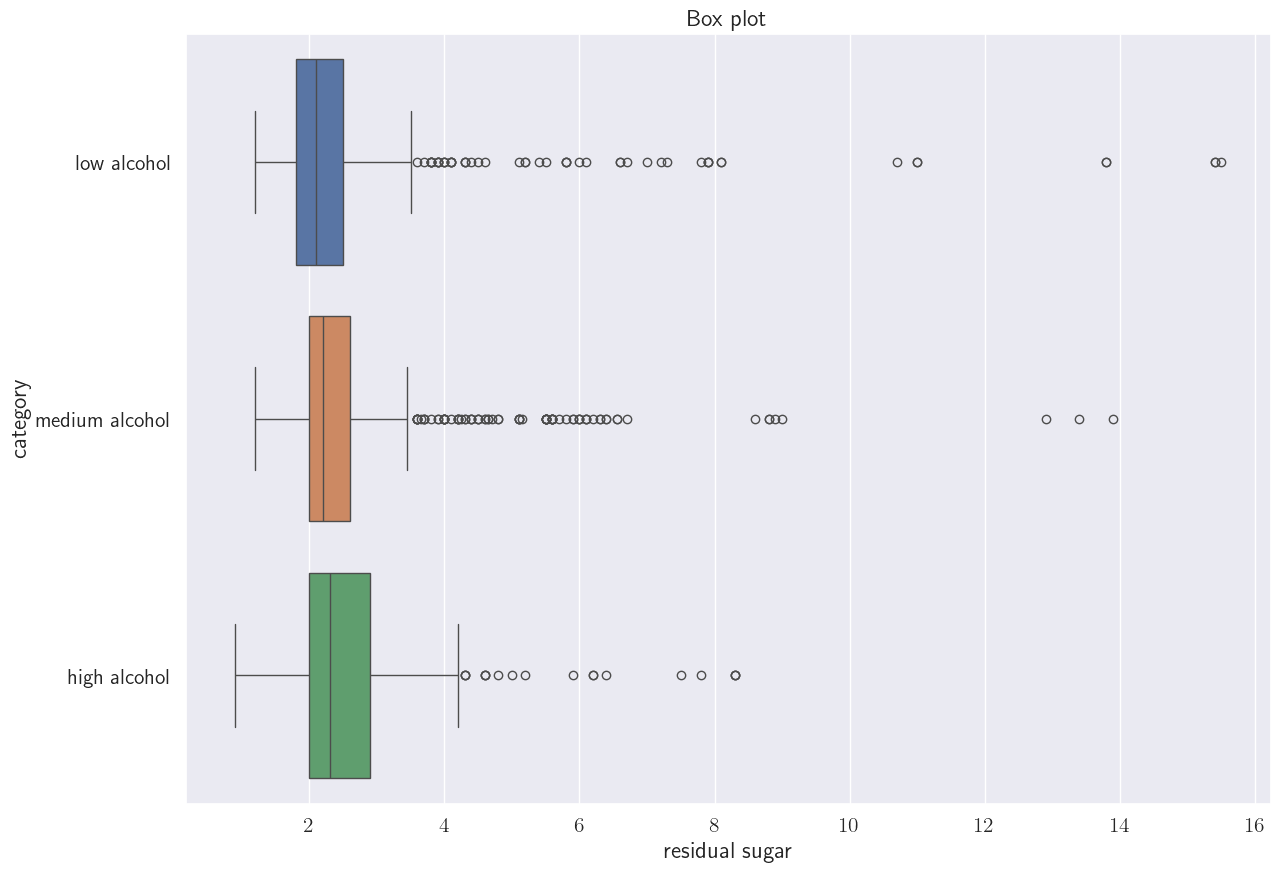

In [2442]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
#YOUR CODE GOES HERE
plt.figure(figsize=(14,10))
plt.title('Box plot')
sns.boxplot(data = data_cut, x='residual sugar', y='category', hue='category')
plt.show()

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** видим, что в каждой из категорий имеются выбросы, лежащие за пределами доверительного $\text{interquartile range}$, которые, как мы уже знаем, могут очень сильно завышать оценку среднего. Поэтому для оценки лучше брать медиану, либо усечённое среднее.

Проанализируйте обе выборки на предмет выбросов. Сколько их? Какую оценку параметра сдвига лучше использовать (считая обе выборки нормальными)?

Ответ:

In [2447]:
print('Low quantile:\n', data_cut.groupby('category')['residual sugar'].quantile(0.25))
print('High quantile:\n', data_cut.groupby('category')['residual sugar'].quantile(0.75))

Low quantile:
 category
high alcohol      2.0
low alcohol       1.8
medium alcohol    2.0
Name: residual sugar, dtype: float64
High quantile:
 category
high alcohol      2.9
low alcohol       2.5
medium alcohol    2.6
Name: residual sugar, dtype: float64


In [2525]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

In [2527]:
print('Low alcohol category number of outliers: %d' %
      (detect_outliers_iqr(data_cut.loc[data['category'] == 'low alcohol']['residual sugar'])))
print('Low alcohol category number of outliers: %d' %
      (detect_outliers_iqr(data_cut.loc[data['category'] == 'medium alcohol']['residual sugar'])))
print('Low alcohol category number of outliers: %d' %
      (detect_outliers_iqr(data_cut.loc[data['category'] == 'high alcohol']['residual sugar'])))

Low alcohol category number of outliers: 54
Low alcohol category number of outliers: 84
Low alcohol category number of outliers: 18


Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

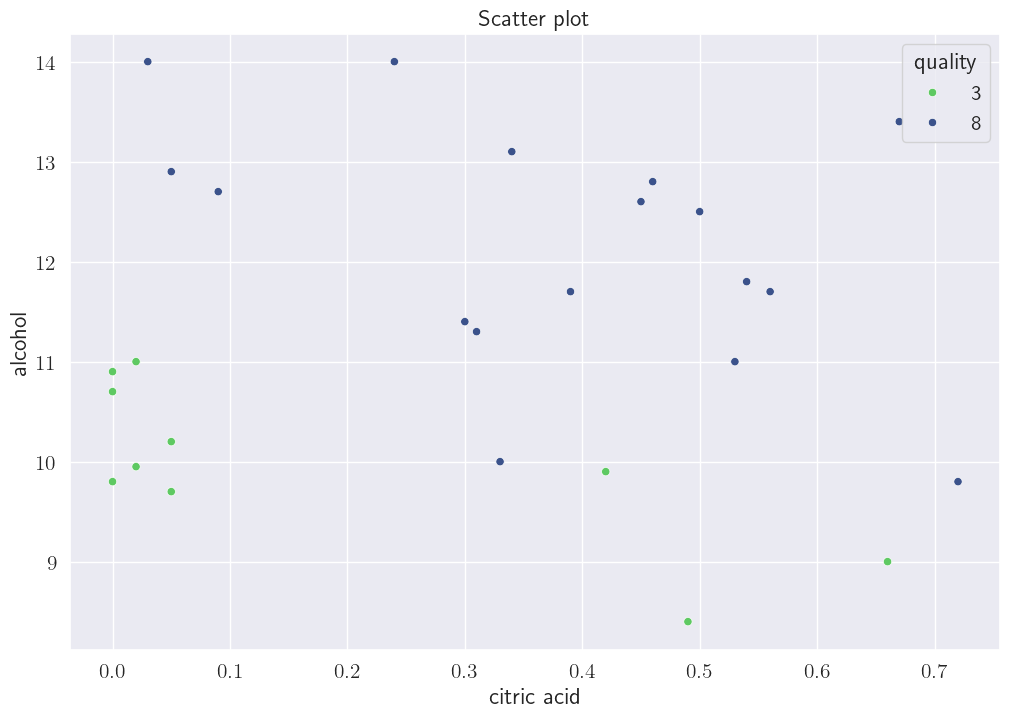

In [2530]:
palette = [palette[0]]+[palette[-1]]
data_short = data.loc[(data['quality'] == 3) | (data['quality'] == 8)]
plt.figure(figsize=(12, 8))
plt.title('Scatter plot')
sns.scatterplot(data_short, x='citric acid', y='alcohol', hue='quality', palette=palette)
#sns.scatterplot(data_short, x='citric acid', y='residual sugar', hue='quality', palette=palette)
plt.show()

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [2533]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low alcohol
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,low alcohol
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low alcohol


In [2535]:
bad = data.loc[data['quality'] == 3][['citric acid', 'alcohol']].to_numpy()
fine = data.loc[data['quality'] == 8][['citric acid', 'alcohol']].to_numpy()

bad_covar = np.cov(bad, ddof=2, rowvar=False)
bad_mean = np.mean(bad, axis=0)
fine_covar = np.cov(fine, ddof=2, rowvar=False)
fine_mean = np.mean(fine, axis=0)
print('Bad wine distribution cov matr: \n', bad_covar)
print('Bad wine distribution mean: \n', bad_mean)
print('Fine wine distribution cov matr: \n', fine_covar)
print('Fine wine distribution mean: \n', fine_mean)

Bad wine distribution cov matr: 
 [[ 0.07068625 -0.17438125]
 [-0.17438125  0.75278125]]
Bad wine distribution mean: 
 [0.171 9.955]
Fine wine distribution cov matr: 
 [[ 0.04229861 -0.11943056]
 [-0.11943056  1.59184028]]
Fine wine distribution mean: 
 [ 0.39111111 12.09444444]


Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

Возьмем покоординатные усеченные средние и усеченные:

In [2539]:
bad_trunc_mean = np.apply_along_axis(truncated_mean, 0, bad)
bad_trunc_covar = np.zeros((2, 2))

for i in range(2):
    for j in range(2):
        bad_trunc_covar[i, j] = truncated_mean(bad[:, i] * bad[:, j]) - truncated_mean(
            bad[:, i])*truncated_mean(bad[:, j])

fine_trunc_mean = np.apply_along_axis(truncated_mean, 0, fine)
fine_trunc_covar = np.zeros((2, 2))

for i in range(2):
    for j in range(2):
        fine_trunc_covar[i, j] = truncated_mean(fine[:, i] * fine[:, j]) - truncated_mean(
            fine[:, i])*truncated_mean(fine[:, j])

print('Bad wine truncated cov matr: \n', bad_trunc_covar)
print('Bad wine truncated mean: \n', bad_trunc_mean)
print('Fine wine truncated cov matr: \n', fine_trunc_covar)
print('Fine wine truncated mean: \n', fine_trunc_mean)

Bad wine truncated cov matr: 
 [[0.000225   0.0048125 ]
 [0.0048125  0.02171875]]
Bad wine truncated mean: 
 [0.035  9.9625]
Fine wine truncated cov matr: 
 [[ 0.00398056 -0.03361111]
 [-0.03361111  0.19222222]]
Fine wine truncated mean: 
 [ 0.41166667 12.16666667]


Больше веры всё таки в обычные средние, поскольку имеем очень маленькие выборки и при обрезании теряется большое количество информации о выборке.

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [2543]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

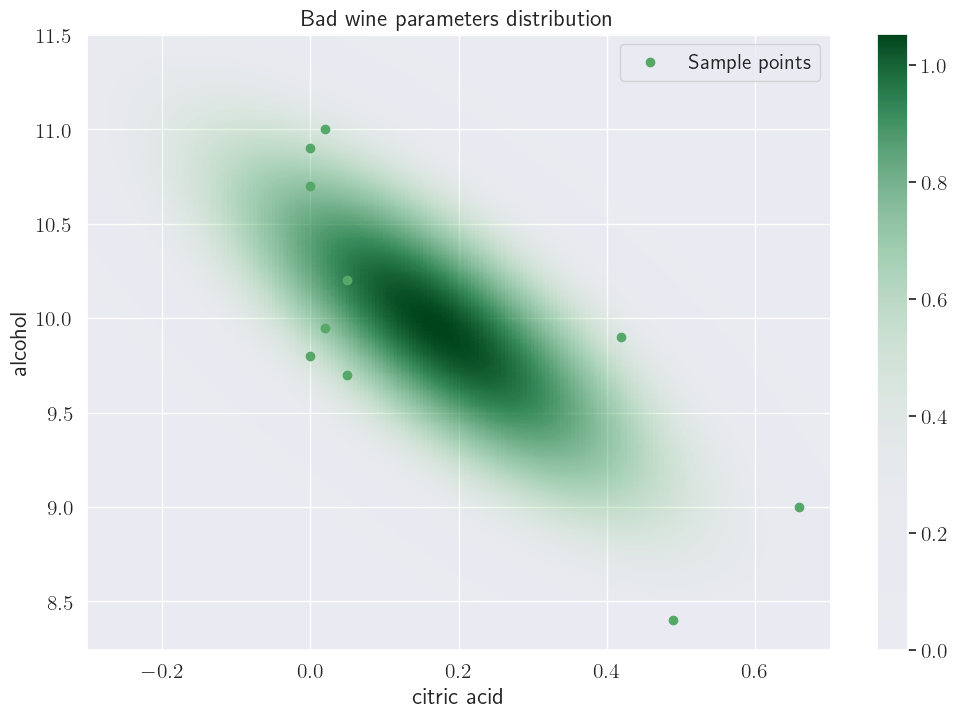

In [2545]:
dx, dy = 0.005, 0.005
y, x = np.mgrid[slice(8.5, 11.5 + dy, dy),
                slice(-0.3, 0.7 + dx, dx)]

distr = sps.multivariate_normal(mean=bad_mean, cov=bad_covar)

z = np.zeros(x.shape)

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        z[i, j] = distr.pdf((x[i][j], y[i][j]))

z_min, z_max = 0, np.abs(z).max()
    
c = plt.pcolormesh(x, y, z, cmap=get_density_cmap('Greens'), vmin = z_min, vmax = z_max)
plt.scatter(bad[:, 0], bad[:, 1], c='g', label='Sample points')
plt.xlabel('citric acid')
plt.ylabel('alcohol')
plt.colorbar(c)
plt.title('Bad wine parameters distribution')
#c.clabel('Multivariate normal approximation')
plt.legend()
plt.show()

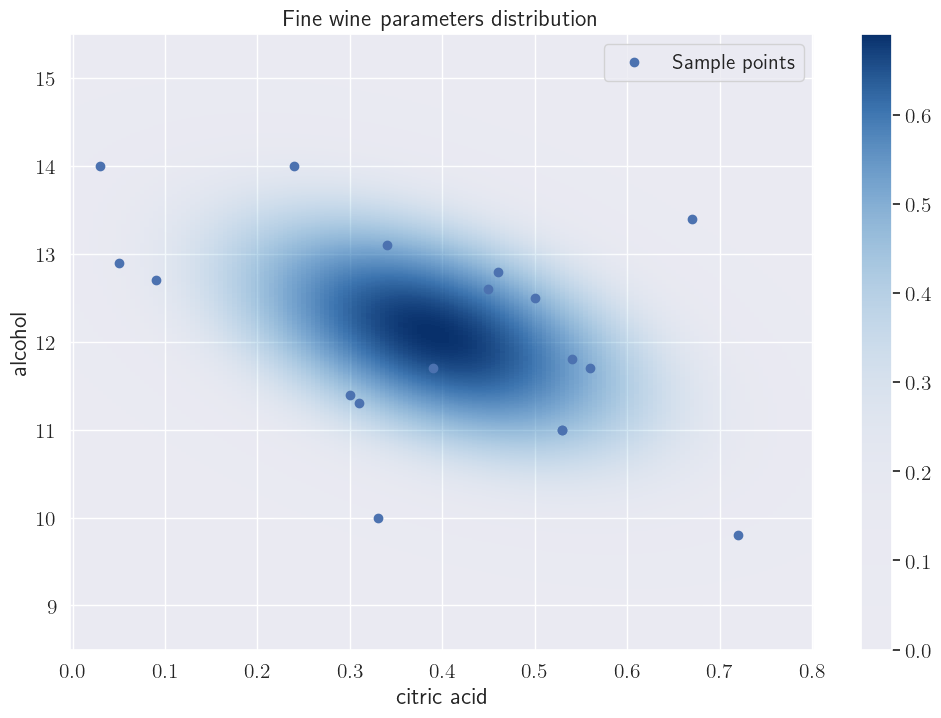

In [2547]:
dx, dy = 0.005, 0.005
y, x = np.mgrid[slice(8.5, 15.5 + dy, dy),
                slice(0, 0.8 + dx, dx)]

distr = sps.multivariate_normal(mean=fine_mean, cov=fine_covar)

z = np.zeros(x.shape)

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        z[i, j] = distr.pdf((x[i][j], y[i][j]))

z_min, z_max = 0, np.abs(z).max()
    
c = plt.pcolormesh(x, y, z, cmap=get_density_cmap('Blues'), vmin = z_min, vmax = z_max)
plt.scatter(fine[:, 0], fine[:, 1], c='b', label='Sample points')
plt.xlabel('citric acid')
plt.ylabel('alcohol')
plt.colorbar(c)
plt.title('Fine wine parameters distribution')
#c.clabel('Multivariate normal approximation')
plt.legend()
plt.show()

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** скорее всего у высокооценённого вина будет выше кислотность и выше процент содержания алкоголя.

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, который с высокой вероятностью накрывает истинное значение параметра.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

In [483]:
def draw_confidence_interval(lower_bound, upper_bound, col='green', label='Confidence interval'):
    N = len(lower_bound)
    plt.fill_between(np.arange(1, N + 1), lower_bound, upper_bound, alpha=0.1, color=col, label=label)

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

Имеем $\mathbb{E}X_{(n)} = \frac{n\theta}{n + 1}, \,\, \mathbb{D}X_{(n)} = \frac{n\theta^2}{(n + 1)^2(n + 2)}$. Тогда неточный доверительный интервал будет иметь вид: $$P\left(|X_{(n)} -\frac{n\theta}{n + 1}| < \varepsilon\right) \ge 1 - \frac{n\theta^2}{(n + 1)^2(n + 2)\varepsilon^2} = \alpha \Rightarrow P\left(\frac{X_{(n)}(n + 1)}{n(1 + \frac{1}{\sqrt{n(n + 2)(1 - \alpha)}})} < \theta < \frac{X_{(n)}(n + 1)}{n(1 - \frac{1}{\sqrt{n(n + 2)(1 - \alpha)}})}\right) \ge \alpha.$$ Так как $F_{X_{(n)}}(x) = \left(\frac{x}{\theta}\right)^n$, имеем $$P(\theta\sqrt[n]{1 - \alpha} < X_{(n)} < \theta) = \alpha$$ а значит выражение для точного доверительного интервала будет иметь вид: $$P\left(X_{(n)} \le \theta < \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}\right) = \alpha.$$

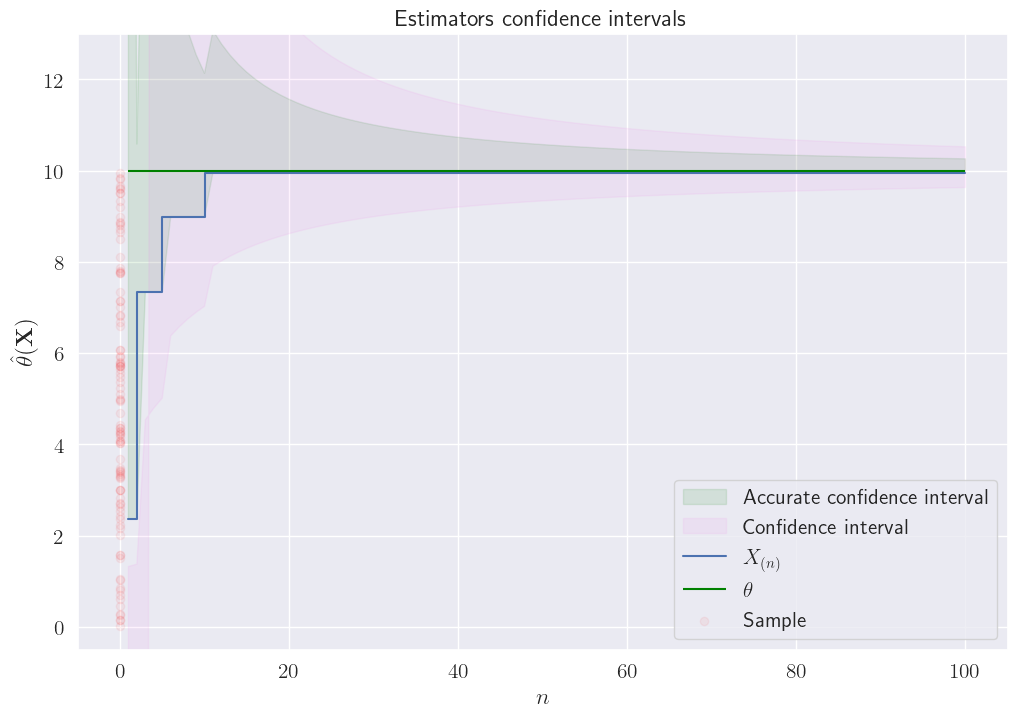

In [763]:
theta = 10
N = 100
X = sps.uniform.rvs(scale=theta, size=N)
alpha = 0.95
n = np.arange(1, N + 1)

theta_est = np.maximum.accumulate(X)
upper_bound = (theta_est*(n + 1))/(n*(1 - 1/np.sqrt(n*(n + 2)*(1 - alpha))))
lower_bound = (theta_est*(n + 1))/(n*(1 + 1/np.sqrt(n*(n + 2)*(1 - alpha))))
upper_bound_accurate = theta_est/((1 - alpha)**(1/n))
lower_bound_accurate = theta_est

plt.figure(figsize(12, 8))
plt.title('Estimators confidence intervals')
draw_confidence_interval(lower_bound_accurate, upper_bound_accurate,
                         label='Accurate confidence interval')
draw_confidence_interval(lower_bound, upper_bound, col='violet')
plt.step(np.arange(1, N + 1), theta_est, label=r'$X_{(n)}$')
plt.hlines(theta, n.min(), n.max(), color='green', label=r'$\theta$')
plt.scatter(np.zeros(N), X, alpha=0.05, color='red', label='Sample')
plt.ylim(-0.5, 13)
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}(\mathbf{X})$')
plt.legend()
plt.show()

In [719]:
#Modeling

X = sps.uniform.rvs(scale=theta, size=(N, N))
alpha = 0.95
n = np.arange(1, N + 1)
theta_est = np.max(X, axis=1)
upper_bound = (theta_est*(N + 1))/(N*(1 - 1/np.sqrt(N*(N + 2)*(1 - alpha))))
lower_bound = (theta_est*(N + 1))/(N*(1 + 1/np.sqrt(N*(N + 2)*(1 - alpha))))
upper_bound_accurate = theta_est/((1 - alpha)**(1/n))
lower_bound_accurate = theta_est
print(f'Number of times the confidence interval enclosed the parameter:\
    {np.count_nonzero((lower_bound < theta) & (upper_bound > theta))}/{N}')
print(f'Number of times the accurate confidence interval enclosed the parameter:\
    {np.count_nonzero((lower_bound_accurate < theta) & (upper_bound_accurate > theta))}/{N}')

Number of times the confidence interval enclosed the parameter:    99/100
Number of times the accurate confidence interval enclosed the parameter:    99/100


### 2. Распределение Коши, $\theta = 10$, оценка — медиана

Точного доверительного интервала тут не найти. Найдём ассимптотический. Пусть $\hat{\mu}(X)$ - выборочная медиана. Мы знаем, что $z_{1/2} = \theta$. Тогда: $$\sqrt{n}(\hat{\mu} - \theta) \xrightarrow{d_\theta} \mathcal{N}\left(0, \frac{\pi^2}{4}\right) \Rightarrow \lim_{n \to \infty} P\left(\hat{\mu} - \frac{\pi u_{\frac{1 + \alpha}{2}}}{2\sqrt{n}} < \theta < \hat{\mu} - \frac{\pi u_{\frac{1 - \alpha}{2}}}{2\sqrt{n}}\right) = \alpha, \quad \text{где} \,\, u_x = F_{\mathcal{N}\left(0, 1\right)}^{-1}(x).$$

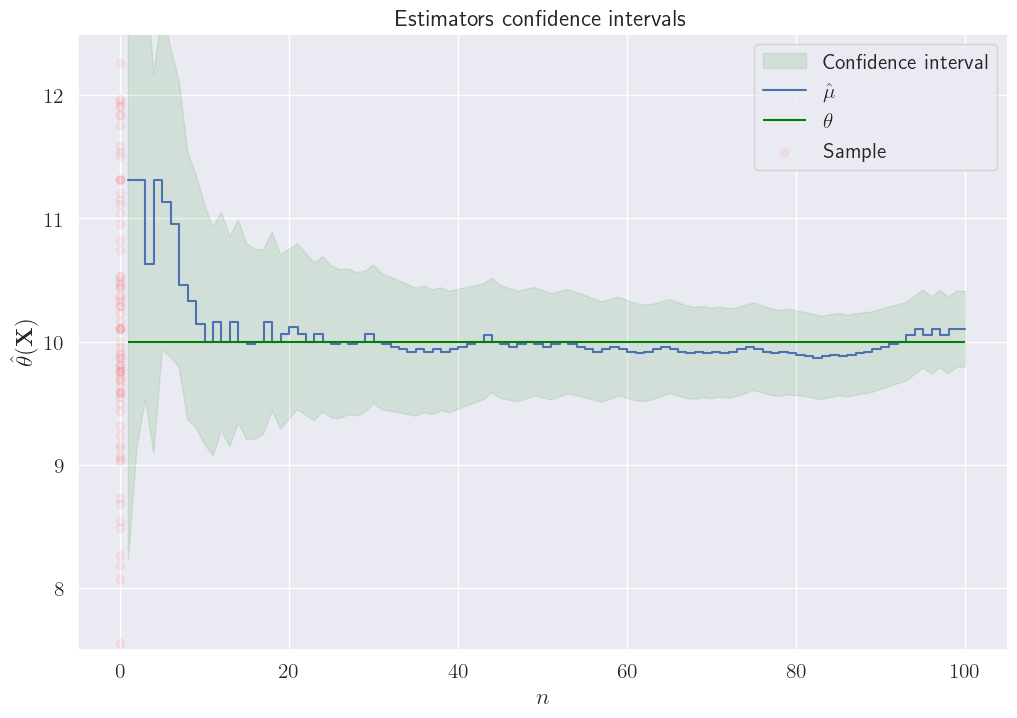

In [921]:
theta = 10
N = 100
X = sps.cauchy.rvs(loc=theta, size=N)
alpha = 0.95
n = np.arange(1, N + 1)
u_lower = sps.norm.ppf((1-alpha)/2)
u_upper = sps.norm.ppf((1+alpha)/2)

theta_est = np.array([np.median(X[:k]) for k in np.arange(1, N + 1)])
lower_bound = theta_est - (np.pi*u_upper)/(2*np.sqrt(n))
upper_bound = theta_est - (np.pi*u_lower)/(2*np.sqrt(n))

plt.figure(figsize(12, 8))
plt.title('Estimators confidence intervals')
draw_confidence_interval(lower_bound, upper_bound)
plt.step(np.arange(1, N + 1), theta_est, label=r'$\hat{\mu}$')
plt.hlines(theta, n.min(), n.max(), color='green', label=r'$\theta$')
plt.scatter(np.zeros(N), X, alpha=0.05, color='red', label='Sample')
plt.ylim(7.5, 12.5)
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}(\mathbf{X})$')
plt.legend()
plt.show()

In [931]:
#Modeling

X = sps.cauchy.rvs(loc=theta, size=(N, N))
alpha = 0.95
n = np.arange(1, N + 1)
theta_est = np.median(X, axis=1)
lower_bound = theta_est - (np.pi*u_upper)/(2*np.sqrt(N))
upper_bound = theta_est - (np.pi*u_lower)/(2*np.sqrt(N))

print(f'Number of times the confidence interval enclosed the parameter:\
    {np.count_nonzero((lower_bound < theta) & (upper_bound > theta))}/{N}')

Number of times the confidence interval enclosed the parameter:    93/100


### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

Имеем: $\mathbb{E}(X_1) = \theta$, $\mathbb{D}(X_1) = \theta$. Тогда $$P\left(\theta - \varepsilon < \overline{X} < \theta + \varepsilon \right) \ge 1 - \frac{\theta}{\varepsilon^2n} = \alpha \Rightarrow P\left(\left(\sqrt{\overline{X} + \frac{1}{4(1 - \alpha)n}} - \sqrt{\frac{1}{4(1-\alpha)n}}\right)^2 < \theta < \left(\sqrt{\overline{X} + \frac{1}{4(1 - \alpha)n}} + \sqrt{\frac{1}{4(1-\alpha)n}} \right)^2\right) \ge \alpha.$$ Выражение для асимптотического доверительного интервала $$\sqrt{n}(\overline{X} - \theta) \xrightarrow{d_\theta} \mathcal{N}(0, \theta) \Rightarrow \lim_{n \to \infty}P\left(\overline{X} - u_{\frac{1+\alpha}{2}}\sqrt{\frac{\overline{X}}{n}} < \theta < \overline{X} - u_{\frac{1-\alpha}{2}}\sqrt{\frac{\overline{X}}{n}}\right) = \alpha$$

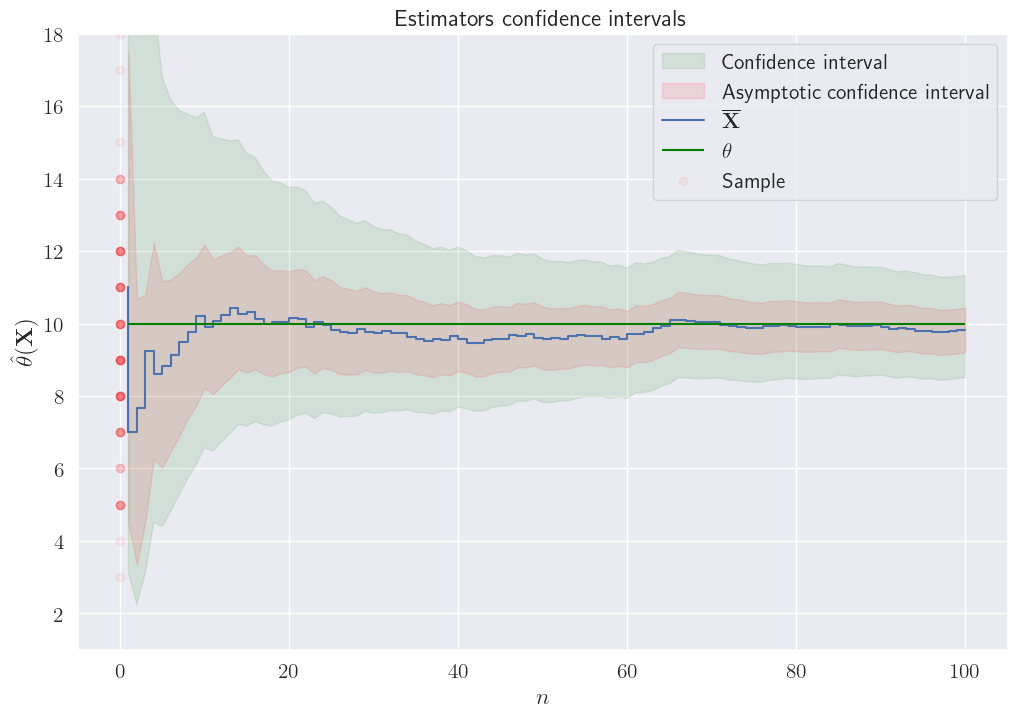

In [975]:
theta = 10
N = 100
X = sps.poisson.rvs(mu=theta, size=N)
alpha = 0.95
n = np.arange(1, N + 1)
u_lower = sps.norm.ppf((1-alpha)/2)
u_upper = sps.norm.ppf((1+alpha)/2)

theta_est = np.cumsum(X)/n
lower_bound = (np.sqrt(theta_est + 1/(4*(1-alpha)*n)) - np.sqrt(1/(4*(1-alpha)*n)))**2
upper_bound = (np.sqrt(theta_est + 1/(4*(1-alpha)*n)) + np.sqrt(1/(4*(1-alpha)*n)))**2
lower_as_bound = theta_est - u_upper*np.sqrt(theta_est/n)
upper_as_bound = theta_est - u_lower*np.sqrt(theta_est/n)

plt.figure(figsize(12, 8))
plt.title('Estimators confidence intervals')
draw_confidence_interval(lower_bound, upper_bound)
draw_confidence_interval(lower_as_bound, upper_as_bound, col='red',
                         label='Asymptotic confidence interval')
plt.step(np.arange(1, N + 1), theta_est, label=r'$\overline{\mathbf{X}}$')
plt.hlines(theta, n.min(), n.max(), color='green', label=r'$\theta$')
plt.scatter(np.zeros(N), X, alpha=0.05, color='red', label='Sample')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}(\mathbf{X})$')
plt.legend()
plt.ylim(1, 18)
plt.show()

In [977]:
#Modeling

X = sps.poisson.rvs(mu=theta, size=(N, N))
alpha = 0.95
u_lower = sps.norm.ppf((1-alpha)/2)
u_upper = sps.norm.ppf((1+alpha)/2)
theta_est = np.mean(X, axis=1)
lower_bound = (np.sqrt(theta_est + 1/(4*(1-alpha)*N)) - np.sqrt(1/(4*(1-alpha)*N)))**2
upper_bound = (np.sqrt(theta_est + 1/(4*(1-alpha)*N)) + np.sqrt(1/(4*(1-alpha)*N)))**2
lower_as_bound = theta_est - u_upper*np.sqrt(theta_est/N)
upper_as_bound = theta_est - u_lower*np.sqrt(theta_est/N)

print(f'Number of times the confidence interval enclosed the parameter:\
    {np.count_nonzero((lower_bound < theta) & (upper_bound > theta))}/{N}')
print(f'Number of times the asymptotic confidence interval enclosed the parameter:\
    {np.count_nonzero((lower_as_bound < theta) & (upper_as_bound > theta))}/{N}')

Number of times the confidence interval enclosed the parameter:    100/100
Number of times the asymptotic confidence interval enclosed the parameter:    98/100


### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

Точного доверительного интервала тут не найти. Найдём ассимптотический. $\mathbb{E}(X_1) = \theta\lambda, \,\, \mathbb{D}(X_1) = \theta\lambda^2.$ Тогда: $$\sqrt{n}\left(\frac{\overline{X}}{\lambda} - \theta\right) \xrightarrow{d_\theta} \mathcal{N}(0, \theta) \Rightarrow \lim_{n \to \infty}P\left(\frac{\overline{X}}{\lambda} - u_{\frac{1+\alpha}{2}}\sqrt{\frac{\overline{X}}{n\lambda}} < \theta < \frac{\overline{X}}{\lambda} - u_{\frac{1-\alpha}{2}}\sqrt{\frac{\overline{X}}{n\lambda}}\right) = \alpha$$

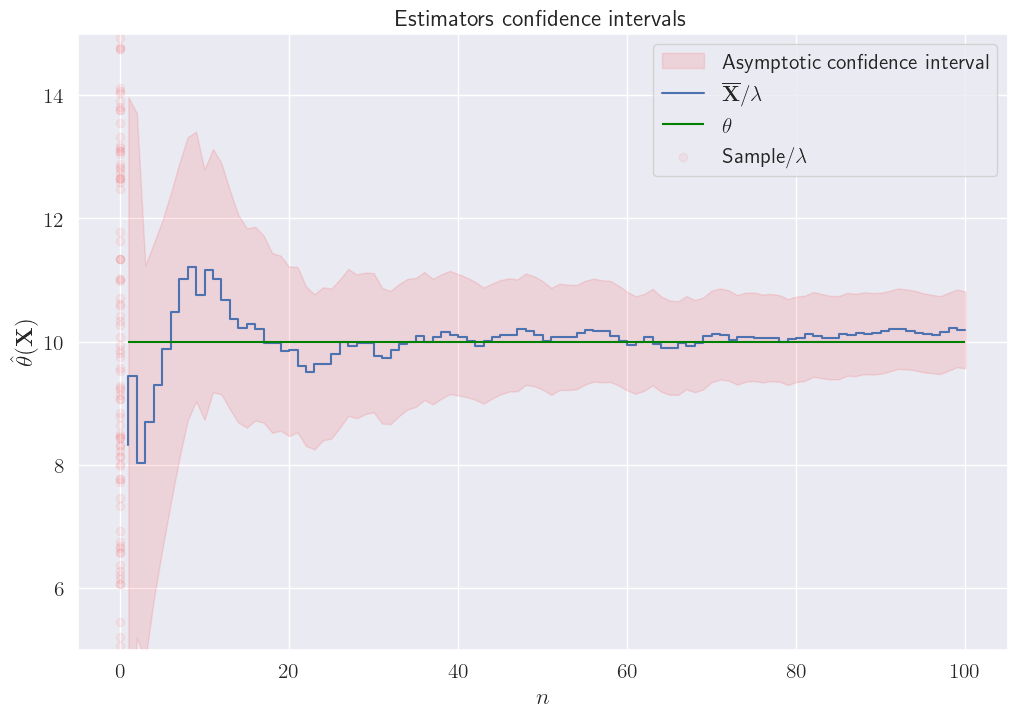

In [1017]:
theta = 10
lamb = 3
N = 100
X = sps.gamma.rvs(theta, scale=lamb, size=N)
alpha = 0.95
n = np.arange(1, N + 1)
u_lower = sps.norm.ppf((1-alpha)/2)
u_upper = sps.norm.ppf((1+alpha)/2)

theta_est = np.cumsum(X)/(n*lamb)
upper_as_bound = theta_est - u_lower*np.sqrt(theta_est/n)
lower_as_bound = theta_est - u_upper*np.sqrt(theta_est/n)


plt.title('Estimators confidence intervals')
draw_confidence_interval(lower_as_bound, upper_as_bound, col='red',
                         label='Asymptotic confidence interval')
plt.step(np.arange(1, N + 1), theta_est, label=r'$\overline{\mathbf{X}}/\lambda$')
plt.hlines(theta, n.min(), n.max(), color='green', label=r'$\theta$')
plt.scatter(np.zeros(N), X/lamb, alpha=0.05, color='red', label=r'Sample/$\lambda$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}(\mathbf{X})$')
plt.ylim(5, 15)
plt.legend()
plt.show()

In [1021]:
#Modeling

X = sps.gamma.rvs(theta, scale=lamb, size=(N, N))
alpha = 0.95
u_lower = sps.norm.ppf((1-alpha)/2)
u_upper = sps.norm.ppf((1+alpha)/2)
theta_est = np.mean(X, axis=1)/lamb
upper_as_bound = theta_est - u_lower*np.sqrt(theta_est/N)
lower_as_bound = theta_est - u_upper*np.sqrt(theta_est/N)

print(f'Number of times the asymptotic confidence interval enclosed the parameter:\
    {np.count_nonzero((lower_as_bound < theta) & (upper_as_bound > theta))}/{N}')

Number of times the asymptotic confidence interval enclosed the parameter:    95/100


Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод: видим, что во всех случаях доверительные интервалы с очень приличной точностью приближают исходный параметр, причем даже с выборкой в 100 элементов. В каждом случае ширина доверительного интервала уменьшается с ростом размера выборки, что хорошо, поскольку чем уже интервал тем лучше, ибо это означает, что мы имеем всё более лучшую оценку параметра и что с заведомо большой вероятностью исходное значение параметра лежит именно в этом узком полученном интервале. Видим также, что неточные доверительные интервалы стабильно шире остальных, поскольку вероятность попадания в них заведомо $\ge \alpha$ и они заведомо захватывают более широкий участок, т.е. работают по принципу "чтоб наверняка". Ширина точного интервала зависит исключительно от функции распределения оценки, а точнее от локализации всей вероятности в окрестности исходного параметра. Ширина асимптотического доверительного интервала очевидным (линейным) образом зависит от асимптотической дисперсии (если для неё нет какой-либо хитрой зависимости от исходного параметра): во сколько раз больше асимптотическое стандартное отклонение, во столько раз шире доверительный интервал.

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


Найдем теоретические интервалы:
1. Точный доверительный интервал уровня доверия $\alpha$ для $a$: пусть $\overline{X} = \dfrac{X_1 + \ldots + X_n}{n}, \,\, s^2 = \dfrac{1}{n - 1}\sum_{i = 1}^{n}(X_i - \overline{X})^2$. Тогда статистика $V = \dfrac{(n-1)s^2}{\sigma^2}$ будет иметь распределение $\chi^2$ с $\nu = n - 1$ степенями свободы. Поскольку $X_1, \ldots, X_n \sim \mathcal{N}(a, \sigma^2)$, мы имеем $\overline{X} \sim \mathcal{N}(a, \sigma^2 / n)$. А значит $Z = \dfrac{(\overline{X} - a)\sqrt{n}}{\sigma}$ имеет стандартное нормальное распределение. Из теорвера также известен факт, что для выборки независимых одинаково распределенных по нормальному закону случайных величин верно, что $\overline{X}$ независима с вектором $(X_1 - \overline{X}, \ldots, X_n - \overline{X})$. А значит $\overline{X}$ независима и с $s^2$ и как следствие $Z$ независима с $V$, а значит статистика $$T = \dfrac{Z}{\sqrt{V / \nu}} = (\overline{X} - a)\dfrac{\sqrt{n}}{s} \sim \mathbf{T}_{n - 1}$$ имеет распределение стьюдента с $\nu = n - 1$ степенями свободы. Обозначим $u_{\gamma}$ - квантиль уровня $\gamma$ распределения $\mathbf{T}_{n - 1}$. Так как $\mathbf{T}_{n - 1}$ - симметрично относительно нуля имеем $u_{\frac{1}{2} + \gamma} = -u_{\frac{1}{2} - \gamma}$. Тогда $$P\left(u_{\frac{1 - \alpha}{2}} < (\overline{X} - a)\dfrac{\sqrt{n}}{s} < u_{\frac{1 + \alpha}{2}}\right) = \alpha \Rightarrow P\left(\overline{X} - \dfrac{s\cdot u_{\frac{1 + \alpha}{2}}}{\sqrt{n}} < a < \overline{X} + \dfrac{s\cdot u_{\frac{1 + \alpha}{2}}}{\sqrt{n}}\right) = \alpha.$$
2. Из ЦПТ и Леммы Слуцкого имеем: $$\dfrac{\sqrt{n}(\overline{X} - a)}{s} = \dfrac{\sqrt{n}(\overline{X} - a)}{\sigma}\cdot\dfrac{\sigma}{s} \xrightarrow{d_{(a, \sigma^2)}} \mathcal{N}(0, 1).$$ Тогда если $u_\gamma$ - квантиль уровня $\gamma$ стандартного нормального распределения, то: $$\lim_{n \to \infty} P\left(-u_{\frac{1 + \alpha}{2}} < \dfrac{\sqrt{n}(\overline{X} - a)}{s} < u_{\frac{1 + \alpha}{2}}\right) = \alpha \Rightarrow \lim_{n \to \infty}P\left(X - \dfrac{s\cdot u_{\frac{1 + \alpha}{2}}}{\sqrt{n}} < a < X + \dfrac{s\cdot u_{\frac{1 + \alpha}{2}}}{\sqrt{n}}\right) = \alpha.$$
3. Пусть имеется выборка $X_1, \ldots, X_n$. Исходная оценка равна $\hat{a} = \overline{X}$. Сгенерируем из выборки $B$ отбутстрапоненных выборок размера $n$. $$F \rightarrow \begin{bmatrix} X_1 \\ \vdots \\ X_n \end{bmatrix} \rightarrow \hat{a} \Rightarrow \hat{F} \rightarrow \begin{bmatrix} X_{1(1)}^* \\ \vdots \\ X_{n(1)}^* \end{bmatrix} \rightarrow \hat{a}_1^*, \, \cdots \, , \begin{bmatrix} X_{1(B)}^* \\ \vdots \\ X_{n(B)}^* \end{bmatrix} \rightarrow \hat{a}_B^*.$$ Полученные оценки отсортируем по неубыванию $\hat{a}_{(1)}^*, \ldots, \hat{a}_{(B)}^*$ и возьмем из этой выборки необходимые $\frac{1 \pm \alpha}{2}$ квантили. Т. е. нам будут нужны $\hat{a}_{(\lceil\frac{1 \pm \alpha}{2}B\rceil)}^*$. Тогда $$\alpha \approx P(\hat{a}_{(\lceil\frac{1 - \alpha}{2}B\rceil)}^* \le \hat{a}^* < \hat{a}_{(\lceil\frac{1 + \alpha}{2}B\rceil)}^*) = P(\hat{a} - \hat{a}_{(\lceil\frac{1 + \alpha}{2}B\rceil)}^* < \hat{a} - \hat{a}^* < \hat{a} - \hat{a}_{(\lceil\frac{1 - \alpha}{2}B\rceil)}^*) \approx P(\hat{a} - \hat{a}_{(\lceil\frac{1 + \alpha}{2}B\rceil)}^* < a - \hat{a} < \hat{a} - \hat{a}_{(\lceil\frac{1 - \alpha}{2}B\rceil)}^*).$$ Значит получим следующую оценку на доверительный на интервал: $$P(2\hat{a} - \hat{a}_{(\lceil\frac{1 + \alpha}{2}B\rceil)}^* < a< 2\hat{a} - \hat{a}_{(\lceil\frac{1 - \alpha}{2}B\rceil)}^*) \approx \alpha$$

Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

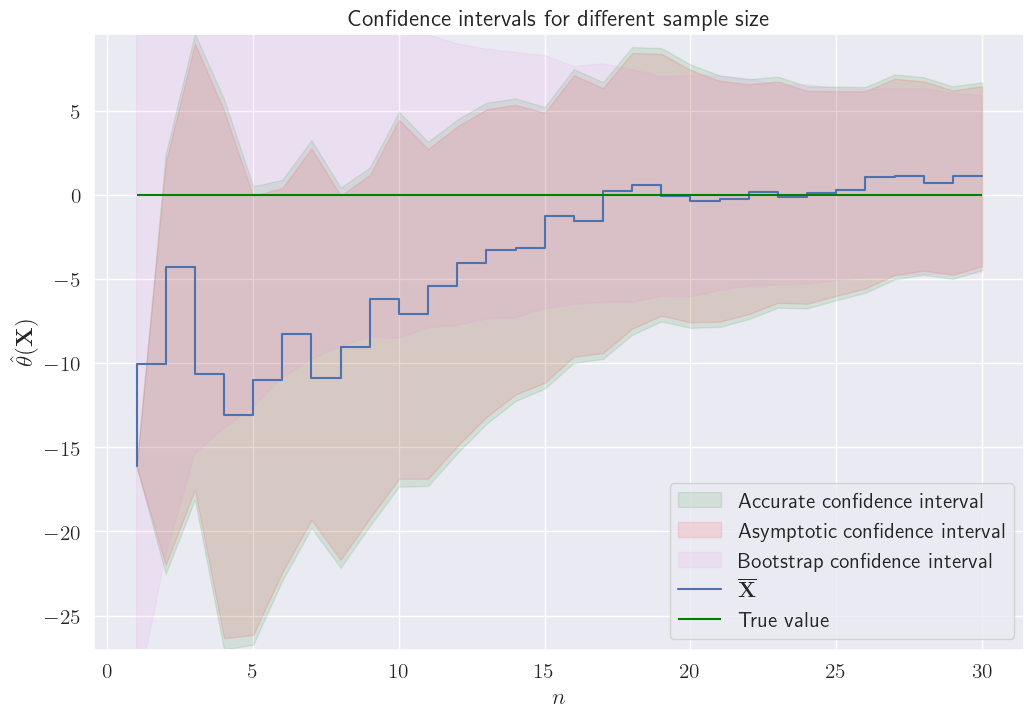

In [1044]:
N = 30
a = 0
alpha = 0.95
X = sps.norm.rvs(a, 20*np.random.rand(), size=N)
n = np.arange(1, N + 1)

est = np.cumsum(X)/n
s_sq = np.zeros(N)
s_sq[1:] = (np.cumsum(X**2)[1:]/n[1:] - est[1:]**2)*n[1:]/(n[1:] - 1)
s = np.sqrt(s_sq)
quantile_student = sps.t.ppf((1 + alpha)/2, N - 1)
quantile_norm = sps.norm.ppf((1 + alpha)/2)

lower_bound_accurate = est - (s*quantile_student)/np.sqrt(n)
upper_bound_accurate = est + (s*quantile_student)/np.sqrt(n)
lower_bound_asymptotic = est - (s*quantile_norm)/np.sqrt(n)
upper_bound_asymptotic = est + (s*quantile_norm)/np.sqrt(n)

B = 1000
bootstrap = np.random.randint(0, N, (B, N))
X_bootstrapped = X[bootstrap]
est_bootstrap = np.sort(np.cumsum(X_bootstrapped, axis=1)/n, axis=0)
low = int(np.ceil(B*(1 - alpha)/2))
up = int(np.ceil(B*(1 + alpha)/2))
lower_bound_bootstrap = est_bootstrap[low - 1]
upper_bound_bootstrap = est_bootstrap[up - 1]

plt.figure(figsize=(12, 8))
plt.title('Confidence intervals for different sample size')
draw_confidence_interval(lower_bound_accurate,
                        upper_bound_accurate,
                        col='green',
                        label='Accurate confidence interval')
draw_confidence_interval(lower_bound_asymptotic,
                        upper_bound_asymptotic,
                        col='red',
                        label='Asymptotic confidence interval')
draw_confidence_interval(lower_bound_bootstrap,
                        upper_bound_bootstrap,
                        col='violet',
                        label='Bootstrap confidence interval')
plt.step(n, est, label=r'$\overline{\mathbf{X}}$')
plt.hlines(0, n.min(), n.max(), color='green', label='True value')
plt.xlabel(r'$n$')
plt.ylabel(r'$\hat{\theta}(\mathbf{X})$')
plt.ylim(lower_bound_accurate.min(), upper_bound_accurate.max())
#plt.xlim(N-5, N)
plt.legend()
plt.show()

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

In [1116]:
N = 1000
a = 0
alpha = 0.95
X = sps.norm.rvs(a, 20*np.random.rand(), size=(N, N))
quantile_student = sps.t.ppf((1 + alpha)/2, N - 1)
quantile_norm = sps.norm.ppf((1 + alpha)/2)

a_est = X.mean(axis=1)
s = X.std(axis=1, ddof=1)
lower_bound_accurate = a_est - (s*quantile_student)/np.sqrt(N)
upper_bound_accurate = a_est + (s*quantile_student)/np.sqrt(N)
lower_bound_asymptotic = a_est - (s*quantile_norm)/np.sqrt(N)
upper_bound_asymptotic = a_est + (s*quantile_norm)/np.sqrt(N)

B = 1000
low = int(np.ceil(B*(1 - alpha)/2))
up = int(np.ceil(B*(1 + alpha)/2))
lower_bound_bootstrap = np.zeros(N)
upper_bound_bootstrap = np.zeros(N)

for i in range(N):
    bootstrap = np.random.randint(0, N, (B, N))
    data = X[i]
    X_bootstrapped = data[bootstrap]
    est_bootstrap = np.sort(X_bootstrapped.mean(axis=1))
    lower_bound_bootstrap[i] = est_bootstrap[low - 1]
    upper_bound_bootstrap[i] = est_bootstrap[up - 1]

count_accurate = np.count_nonzero((lower_bound_accurate < a) & (upper_bound_accurate > a))
count_asymptotic = np.count_nonzero((lower_bound_asymptotic < a) & (upper_bound_asymptotic > a))
count_bootstrap = np.count_nonzero((lower_bound_bootstrap < a) & (upper_bound_bootstrap > a))

print(f'Number of times the accurate confidence interval enclosed the parameter:\
    {count_accurate}/{N}; probability: {count_accurate/N}')
print(f'Number of times the asymptotic confidence interval enclosed the parameter:\
    {count_asymptotic}/{N}; probability: {count_asymptotic/N}')
print(f'Number of times the bootstrap confidence interval enclosed the parameter:\
    {count_bootstrap}/{N}; probability: {count_bootstrap/N}')

Number of times the accurate confidence interval enclosed the parameter:    946/1000; probability: 0.946
Number of times the asymptotic confidence interval enclosed the parameter:    945/1000; probability: 0.945
Number of times the bootstrap confidence interval enclosed the parameter:    941/1000; probability: 0.941


Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод: видим, что среди неточных доверительных интервалов, ожидаемо более точным оказывается асимптотический: вероятность попадания параметра в него ближе к теоретическому значению $0.95$. Однако даже несмотря на это значения все равно близки друг к другу и оба варианта дают хорошее приближение точного доверительного интервала. Из графика выше также видно, что уже при размере выборки $n = 30$ все три варианта доверительного интервала очень близки и похожи.

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [1119]:
!gdown https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-
To: /Users/dmitrijhvatov/Desktop/Статы_Python/HW/1hvODMPkJPe0HLIGq8RgClN1_RSw2gfD-
91.6kB [00:00, 77.7MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [2549]:
data = pd.read_csv("city_day.csv", usecols=['City', 'Date', 'AQI'], parse_dates=[1])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data = data.dropna()
data = data.loc[(data['City'] == 'Mumbai') | (data['City'] == 'Kolkata')]
data = data.loc[data['Date'] >= '2018-07-01']
data = data.reset_index(drop=True)
data

,City,Date,AQI,Year,Month
0,Kolkata,2018-07-01,58.0,2018,7
1,Kolkata,2018-07-02,62.0,2018,7
2,Kolkata,2018-07-03,50.0,2018,7
3,Kolkata,2018-07-04,58.0,2018,7
4,Kolkata,2018-07-05,57.0,2018,7
...,...,...,...,...,...
1448,Mumbai,2020-06-27,64.0,2020,6
1449,Mumbai,2020-06-28,64.0,2020,6
1450,Mumbai,2020-06-29,54.0,2020,6
1451,Mumbai,2020-06-30,54.0,2020,6


В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включительно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [2553]:
data_new = data.loc[data['Date'] < '2020-07-01']
data_new = data_new.reset_index(drop=True)
data_new.head()

,City,Date,AQI,Year,Month
0,Kolkata,2018-07-01,58.0,2018,7
1,Kolkata,2018-07-02,62.0,2018,7
2,Kolkata,2018-07-03,50.0,2018,7
3,Kolkata,2018-07-04,58.0,2018,7
4,Kolkata,2018-07-05,57.0,2018,7


In [2559]:
def bootstrap_left(s):
    alpha = 0.95
    data = s.to_numpy()
    N = len(data)
    bootstrap_indices = np.random.randint(0, N, (N, N))
    data_bootstrapped = data[bootstrap_indices]
    est_bootstrap = np.sort(data_bootstrapped.mean(axis=1))
    low = int(np.ceil(N*(1 - alpha)/2))
    up = int(np.ceil(N*(1 + alpha)/2))
    lb = est_bootstrap[low - 1]
    ub = est_bootstrap[up - 1]
    return lb

def bootstrap_right(s):
    alpha = 0.95
    data = s.to_numpy()
    N = len(data)
    bootstrap_indices = np.random.randint(0, N, (N, N))
    data_bootstrapped = data[bootstrap_indices]
    est_bootstrap = np.sort(data_bootstrapped.mean(axis=1))
    low = int(np.ceil(N*(1 - alpha)/2))
    up = int(np.ceil(N*(1 + alpha)/2))
    lb = est_bootstrap[low - 1]
    ub = est_bootstrap[up - 1]
    return ub

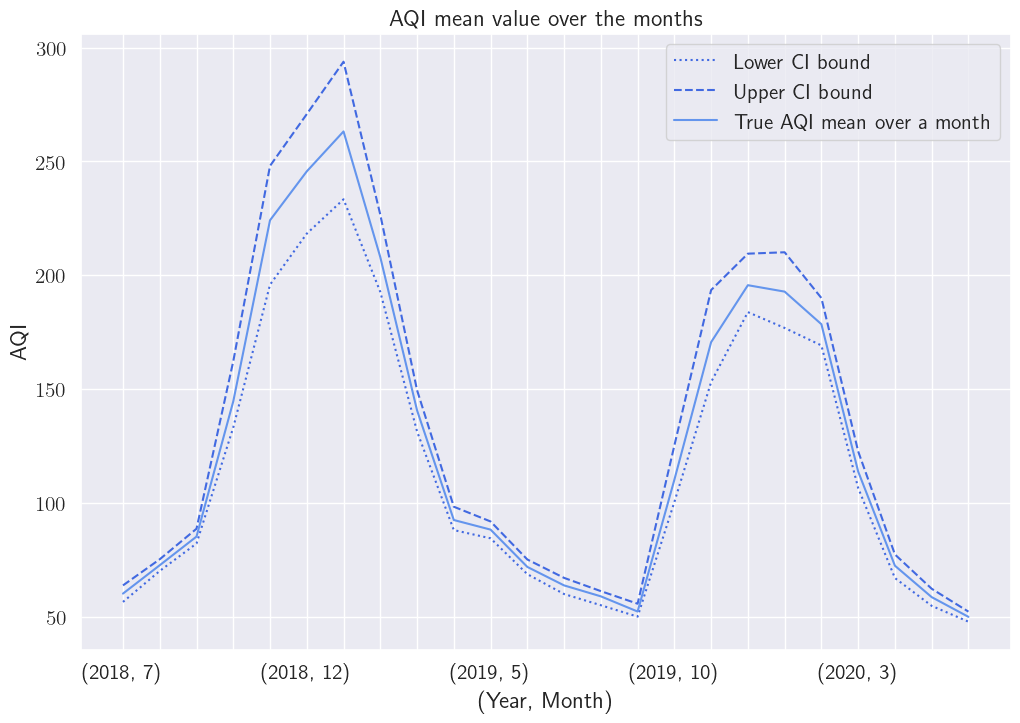

In [2561]:
lower_bound = data_new.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_left)
upper_bound = data_new.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_right)
true_mean = data_new.groupby(['Year', 'Month'])['AQI'].mean()

fig, axs = plt.subplots()

plt.title('AQI mean value over the months')
lower_bound.plot(ax=axs, color='royalblue', label='Lower CI bound', linestyle='dotted')
upper_bound.plot(ax=axs, color='royalblue', label='Upper CI bound', linestyle='dashed')
true_mean.plot(ax=axs, color='cornflowerblue', label='True AQI mean over a month')
axs.set_xticks(range(len(lower_bound)))

plt.xlabel('(Year, Month)')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [2563]:
print(lower_bound.index)

MultiIndex([(2018,  7),
            (2018,  8),
            (2018,  9),
            (2018, 10),
            (2018, 11),
            (2018, 12),
            (2019,  1),
            (2019,  2),
            (2019,  3),
            (2019,  4),
            (2019,  5),
            (2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (2019, 10),
            (2019, 11),
            (2019, 12),
            (2020,  1),
            (2020,  2),
            (2020,  3),
            (2020,  4),
            (2020,  5),
            (2020,  6)],
           names=['Year', 'Month'])


Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [2566]:
data_new_mumbai = data.loc[(data['Date'] < '2020-07-01') & (data['City'] == 'Mumbai')]
data_new_mumbai = data_new_mumbai.reset_index(drop=True)
data_new_kolkata = data.loc[(data['Date'] < '2020-07-01') & (data['City'] == 'Kolkata')]
data_new_kolkata = data_new_kolkata.reset_index(drop=True)

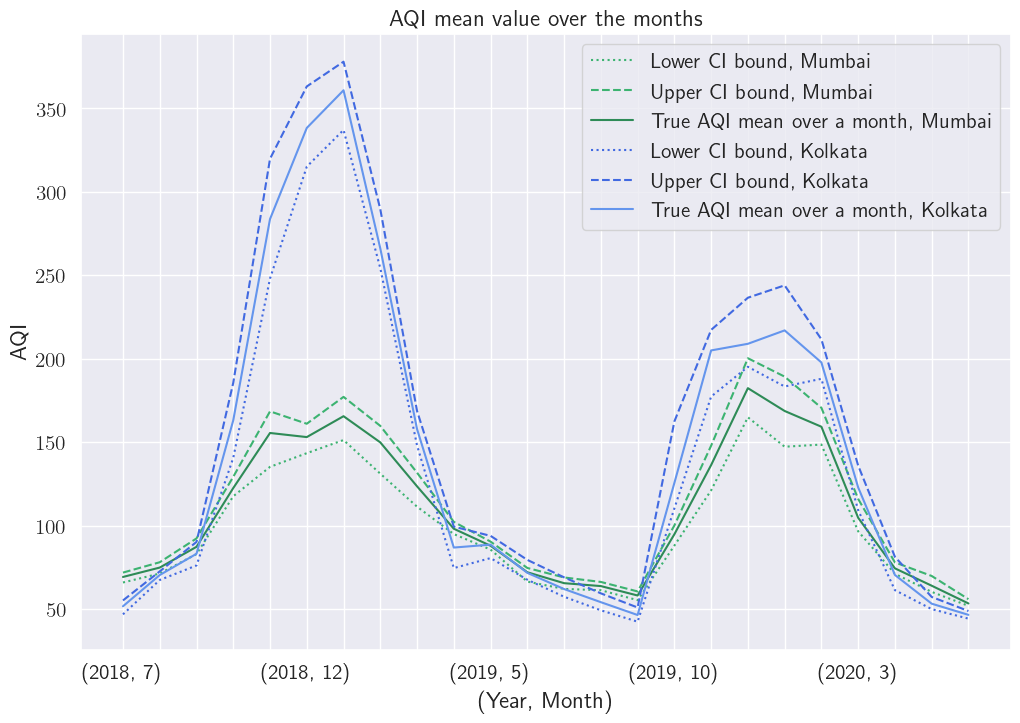

In [2568]:
fig, axs = plt.subplots()
plt.title('AQI mean value over the months')

data_new_mumbai.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_left).plot(
    ax=axs, color='mediumseagreen',
    label='Lower CI bound, Mumbai',
    linestyle='dotted')
data_new_mumbai.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_right).plot(
    ax=axs, color='mediumseagreen',
    label='Upper CI bound, Mumbai',
    linestyle='dashed')
data_new_mumbai.groupby(['Year', 'Month'])['AQI'].mean().plot(
    ax=axs, color='seagreen',
    label='True AQI mean over a month, Mumbai')
data_new_kolkata.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_left).plot(
    ax=axs, color='royalblue',
    label='Lower CI bound, Kolkata',
    linestyle='dotted')
data_new_kolkata.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_right).plot(
    ax=axs, color='royalblue',
    label='Upper CI bound, Kolkata',
    linestyle='dashed')
data_new_kolkata.groupby(['Year', 'Month'])['AQI'].mean().plot(
    ax=axs, color='cornflowerblue',
    label='True AQI mean over a month, Kolkata')
axs.set_xticks(range(len(lower_bound)))



plt.xlabel('(Year, Month)')
plt.ylabel('AQI')
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

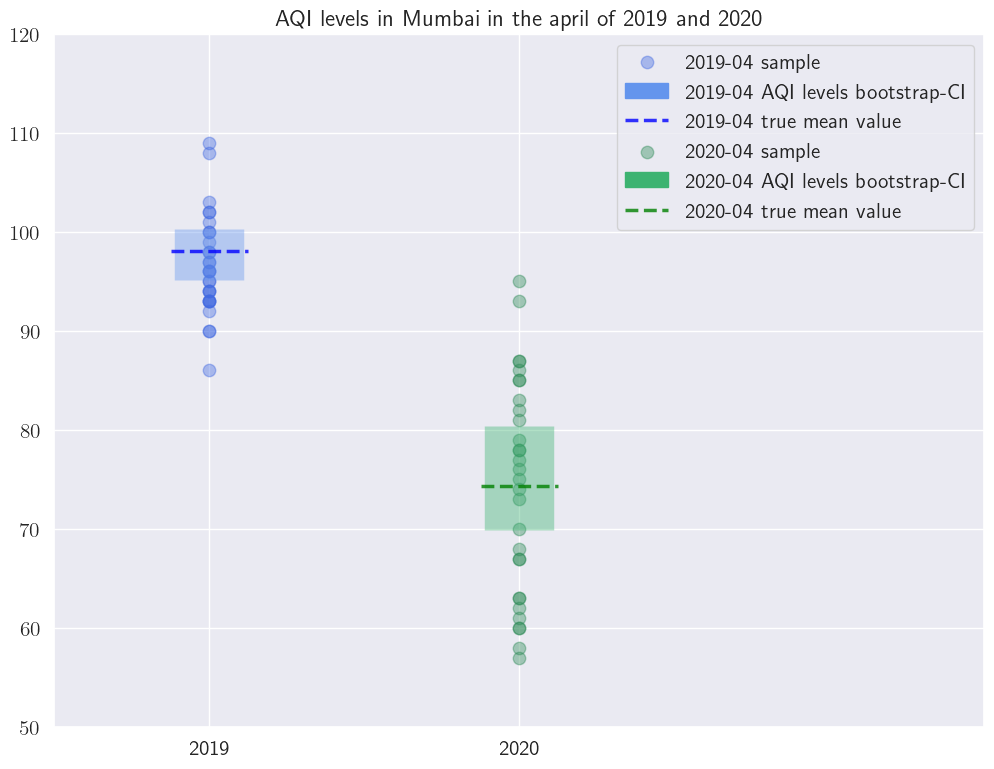

In [2783]:
data_april_mumbai = data.loc[(data['Month'] == 4) & (data['Year'] >= 2019) & (data['City'] == 'Mumbai')]

plt.figure(figsize=(12, 9))
plt.title('AQI levels in Mumbai in the april of 2019 and 2020')

first_left = data_april_mumbai.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_left)[(2019, 4)]
first_right = data_april_mumbai.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_right)[(2019, 4)]
second_left = data_april_mumbai.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_left)[(2020, 4)]
second_right = data_april_mumbai.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_right)[(2020, 4)]
mumb_first = data_april_mumbai.loc[data_april_mumbai['Year'] == 2019]['AQI'].to_numpy()
mumb_second = data_april_mumbai.loc[data_april_mumbai['Year'] == 2020]['AQI'].to_numpy()

plt.scatter(np.full(len(mumb_first), -1), mumb_first, alpha=0.4, color='royalblue', s=80.0, label='2019-04 sample')
plt.fill_between([-1], first_left, first_right, alpha=0.4, linewidth=50.0, color='cornflowerblue')
plt.fill_between([0], 0, color='cornflowerblue', label='2019-04 AQI levels bootstrap-CI')
plt.hlines(mumb_first.mean(), -1.25, -0.75, lw=2.5, ls='dashed', alpha=0.8, color='blue', label='2019-04 true mean value')
plt.scatter(np.full(len(mumb_second), 1), mumb_second, alpha=0.4, color='seagreen', s=80.0, label='2020-04 sample')
plt.fill_between([1], second_left, second_right, alpha=0.4, linewidth=50.0, color='mediumseagreen')
plt.fill_between([0], 0, color='mediumseagreen', label='2020-04 AQI levels bootstrap-CI')
plt.hlines(mumb_second.mean(), 0.75, 1.25, lw=2.5, ls='dashed', alpha=0.8, color='green', label='2020-04 true mean value')
plt.xticks((-1, 1), (2019, 2020))
plt.xlim(-2, 4)
plt.ylim(50, 120)
plt.legend()
plt.show()

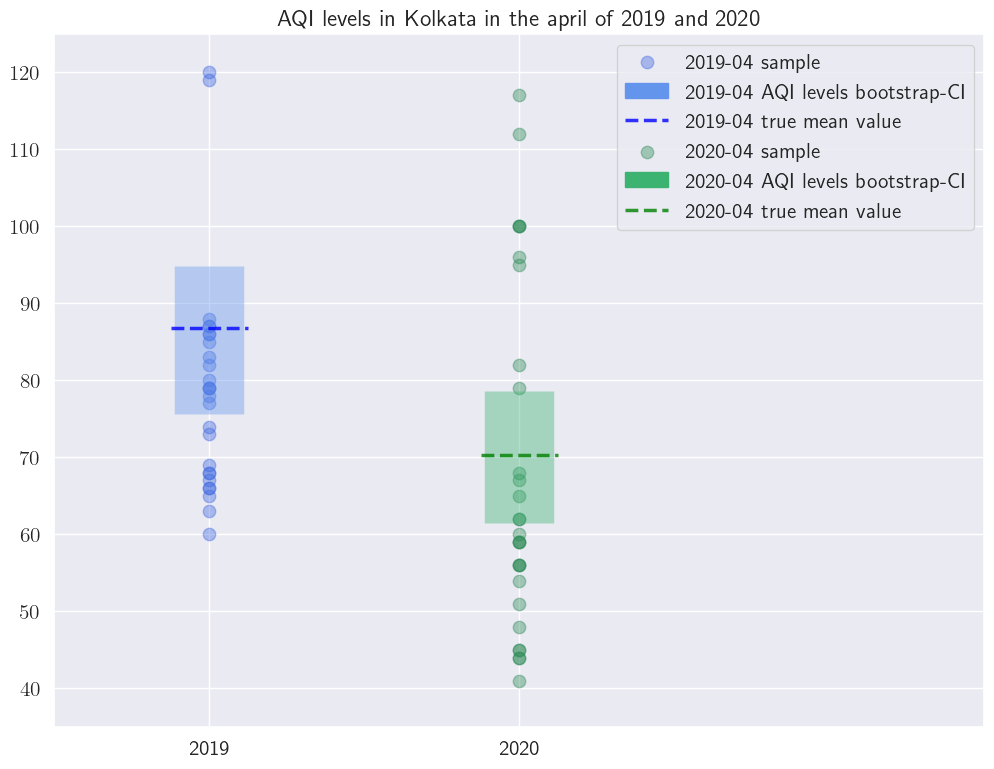

In [2795]:
data_april_kolkata = data.loc[(data['Month'] == 4) & (data['Year'] >= 2019) & (data['City'] == 'Kolkata')]

plt.figure(figsize=(12, 9))
plt.title('AQI levels in Kolkata in the april of 2019 and 2020')

first_left = data_april_kolkata.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_left)[(2019, 4)]
first_right = data_april_kolkata.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_right)[(2019, 4)]
second_left = data_april_kolkata.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_left)[(2020, 4)]
second_right = data_april_kolkata.groupby(['Year', 'Month'])['AQI'].agg(bootstrap_right)[(2020, 4)]
kolk_first = data_april_kolkata.loc[data_april_kolkata['Year'] == 2019]['AQI'].to_numpy()
kolk_second = data_april_kolkata.loc[data_april_kolkata['Year'] == 2020]['AQI'].to_numpy()

plt.scatter(np.full(len(kolk_first), -1), kolk_first, alpha=0.4, color='royalblue', s=80.0, label='2019-04 sample')
plt.fill_between([-1], first_left, first_right, alpha=0.4, linewidth=50.0, color='cornflowerblue')
plt.fill_between([0], 0, color='cornflowerblue', label='2019-04 AQI levels bootstrap-CI')
plt.hlines(kolk_first.mean(), -1.25, -0.75, lw=2.5, ls='dashed', alpha=0.8, color='blue', label='2019-04 true mean value')
plt.scatter(np.full(len(kolk_second), 1), kolk_second, alpha=0.4, color='seagreen', s=80.0, label='2020-04 sample')
plt.fill_between([1], second_left, second_right, alpha=0.4, linewidth=50.0, color='mediumseagreen')
plt.fill_between([0], 0, color='mediumseagreen', label='2020-04 AQI levels bootstrap-CI')
plt.hlines(kolk_second.mean(), 0.75, 1.25, lw=2.5, ls='dashed', alpha=0.8, color='green', label='2020-04 true mean value')
plt.xticks((-1, 1), (2019, 2020))
plt.xlim(-2, 4)
plt.ylim(35, 125)
plt.legend()
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?

Круто. Загрязнение вознуха падает с годами. Видим также, что бутстрепные доверительные интервалы достаточно хорошо описывают статистику среднего.